In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.segmentation import find_boundaries
%load_ext autoreload
%autoreload 2
import sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
import time

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
# Imagenet column id, data label mappings
column_to_label = {"0": ["n01440764", "tench"], "1": ["n01443537", "goldfish"], "2": ["n01484850", "great_white_shark"], "3": ["n01491361", "tiger_shark"], "4": ["n01494475", "hammerhead"], "5": ["n01496331", "electric_ray"], "6": ["n01498041", "stingray"], "7": ["n01514668", "cock"], "8": ["n01514859", "hen"], "9": ["n01518878", "ostrich"], "10": ["n01530575", "brambling"], "11": ["n01531178", "goldfinch"], "12": ["n01532829", "house_finch"], "13": ["n01534433", "junco"], "14": ["n01537544", "indigo_bunting"], "15": ["n01558993", "robin"], "16": ["n01560419", "bulbul"], "17": ["n01580077", "jay"], "18": ["n01582220", "magpie"], "19": ["n01592084", "chickadee"], "20": ["n01601694", "water_ouzel"], "21": ["n01608432", "kite"], "22": ["n01614925", "bald_eagle"], "23": ["n01616318", "vulture"], "24": ["n01622779", "great_grey_owl"], "25": ["n01629819", "European_fire_salamander"], "26": ["n01630670", "common_newt"], "27": ["n01631663", "eft"], "28": ["n01632458", "spotted_salamander"], "29": ["n01632777", "axolotl"], "30": ["n01641577", "bullfrog"], "31": ["n01644373", "tree_frog"], "32": ["n01644900", "tailed_frog"], "33": ["n01664065", "loggerhead"], "34": ["n01665541", "leatherback_turtle"], "35": ["n01667114", "mud_turtle"], "36": ["n01667778", "terrapin"], "37": ["n01669191", "box_turtle"], "38": ["n01675722", "banded_gecko"], "39": ["n01677366", "common_iguana"], "40": ["n01682714", "American_chameleon"], "41": ["n01685808", "whiptail"], "42": ["n01687978", "agama"], "43": ["n01688243", "frilled_lizard"], "44": ["n01689811", "alligator_lizard"], "45": ["n01692333", "Gila_monster"], "46": ["n01693334", "green_lizard"], "47": ["n01694178", "African_chameleon"], "48": ["n01695060", "Komodo_dragon"], "49": ["n01697457", "African_crocodile"], "50": ["n01698640", "American_alligator"], "51": ["n01704323", "triceratops"], "52": ["n01728572", "thunder_snake"], "53": ["n01728920", "ringneck_snake"], "54": ["n01729322", "hognose_snake"], "55": ["n01729977", "green_snake"], "56": ["n01734418", "king_snake"], "57": ["n01735189", "garter_snake"], "58": ["n01737021", "water_snake"], "59": ["n01739381", "vine_snake"], "60": ["n01740131", "night_snake"], "61": ["n01742172", "boa_constrictor"], "62": ["n01744401", "rock_python"], "63": ["n01748264", "Indian_cobra"], "64": ["n01749939", "green_mamba"], "65": ["n01751748", "sea_snake"], "66": ["n01753488", "horned_viper"], "67": ["n01755581", "diamondback"], "68": ["n01756291", "sidewinder"], "69": ["n01768244", "trilobite"], "70": ["n01770081", "harvestman"], "71": ["n01770393", "scorpion"], "72": ["n01773157", "black_and_gold_garden_spider"], "73": ["n01773549", "barn_spider"], "74": ["n01773797", "garden_spider"], "75": ["n01774384", "black_widow"], "76": ["n01774750", "tarantula"], "77": ["n01775062", "wolf_spider"], "78": ["n01776313", "tick"], "79": ["n01784675", "centipede"], "80": ["n01795545", "black_grouse"], "81": ["n01796340", "ptarmigan"], "82": ["n01797886", "ruffed_grouse"], "83": ["n01798484", "prairie_chicken"], "84": ["n01806143", "peacock"], "85": ["n01806567", "quail"], "86": ["n01807496", "partridge"], "87": ["n01817953", "African_grey"], "88": ["n01818515", "macaw"], "89": ["n01819313", "sulphur-crested_cockatoo"], "90": ["n01820546", "lorikeet"], "91": ["n01824575", "coucal"], "92": ["n01828970", "bee_eater"], "93": ["n01829413", "hornbill"], "94": ["n01833805", "hummingbird"], "95": ["n01843065", "jacamar"], "96": ["n01843383", "toucan"], "97": ["n01847000", "drake"], "98": ["n01855032", "red-breasted_merganser"], "99": ["n01855672", "goose"], "100": ["n01860187", "black_swan"], "101": ["n01871265", "tusker"], "102": ["n01872401", "echidna"], "103": ["n01873310", "platypus"], "104": ["n01877812", "wallaby"], "105": ["n01882714", "koala"], "106": ["n01883070", "wombat"], "107": ["n01910747", "jellyfish"], "108": ["n01914609", "sea_anemone"], "109": ["n01917289", "brain_coral"], "110": ["n01924916", "flatworm"], "111": ["n01930112", "nematode"], "112": ["n01943899", "conch"], "113": ["n01944390", "snail"], "114": ["n01945685", "slug"], "115": ["n01950731", "sea_slug"], "116": ["n01955084", "chiton"], "117": ["n01968897", "chambered_nautilus"], "118": ["n01978287", "Dungeness_crab"], "119": ["n01978455", "rock_crab"], "120": ["n01980166", "fiddler_crab"], "121": ["n01981276", "king_crab"], "122": ["n01983481", "American_lobster"], "123": ["n01984695", "spiny_lobster"], "124": ["n01985128", "crayfish"], "125": ["n01986214", "hermit_crab"], "126": ["n01990800", "isopod"], "127": ["n02002556", "white_stork"], "128": ["n02002724", "black_stork"], "129": ["n02006656", "spoonbill"], "130": ["n02007558", "flamingo"], "131": ["n02009229", "little_blue_heron"], "132": ["n02009912", "American_egret"], "133": ["n02011460", "bittern"], "134": ["n02012849", "crane"], "135": ["n02013706", "limpkin"], "136": ["n02017213", "European_gallinule"], "137": ["n02018207", "American_coot"], "138": ["n02018795", "bustard"], "139": ["n02025239", "ruddy_turnstone"], "140": ["n02027492", "red-backed_sandpiper"], "141": ["n02028035", "redshank"], "142": ["n02033041", "dowitcher"], "143": ["n02037110", "oystercatcher"], "144": ["n02051845", "pelican"], "145": ["n02056570", "king_penguin"], "146": ["n02058221", "albatross"], "147": ["n02066245", "grey_whale"], "148": ["n02071294", "killer_whale"], "149": ["n02074367", "dugong"], "150": ["n02077923", "sea_lion"], "151": ["n02085620", "Chihuahua"], "152": ["n02085782", "Japanese_spaniel"], "153": ["n02085936", "Maltese_dog"], "154": ["n02086079", "Pekinese"], "155": ["n02086240", "Shih-Tzu"], "156": ["n02086646", "Blenheim_spaniel"], "157": ["n02086910", "papillon"], "158": ["n02087046", "toy_terrier"], "159": ["n02087394", "Rhodesian_ridgeback"], "160": ["n02088094", "Afghan_hound"], "161": ["n02088238", "basset"], "162": ["n02088364", "beagle"], "163": ["n02088466", "bloodhound"], "164": ["n02088632", "bluetick"], "165": ["n02089078", "black-and-tan_coonhound"], "166": ["n02089867", "Walker_hound"], "167": ["n02089973", "English_foxhound"], "168": ["n02090379", "redbone"], "169": ["n02090622", "borzoi"], "170": ["n02090721", "Irish_wolfhound"], "171": ["n02091032", "Italian_greyhound"], "172": ["n02091134", "whippet"], "173": ["n02091244", "Ibizan_hound"], "174": ["n02091467", "Norwegian_elkhound"], "175": ["n02091635", "otterhound"], "176": ["n02091831", "Saluki"], "177": ["n02092002", "Scottish_deerhound"], "178": ["n02092339", "Weimaraner"], "179": ["n02093256", "Staffordshire_bullterrier"], "180": ["n02093428", "American_Staffordshire_terrier"], "181": ["n02093647", "Bedlington_terrier"], "182": ["n02093754", "Border_terrier"], "183": ["n02093859", "Kerry_blue_terrier"], "184": ["n02093991", "Irish_terrier"], "185": ["n02094114", "Norfolk_terrier"], "186": ["n02094258", "Norwich_terrier"], "187": ["n02094433", "Yorkshire_terrier"], "188": ["n02095314", "wire-haired_fox_terrier"], "189": ["n02095570", "Lakeland_terrier"], "190": ["n02095889", "Sealyham_terrier"], "191": ["n02096051", "Airedale"], "192": ["n02096177", "cairn"], "193": ["n02096294", "Australian_terrier"], "194": ["n02096437", "Dandie_Dinmont"], "195": ["n02096585", "Boston_bull"], "196": ["n02097047", "miniature_schnauzer"], "197": ["n02097130", "giant_schnauzer"], "198": ["n02097209", "standard_schnauzer"], "199": ["n02097298", "Scotch_terrier"], "200": ["n02097474", "Tibetan_terrier"], "201": ["n02097658", "silky_terrier"], "202": ["n02098105", "soft-coated_wheaten_terrier"], "203": ["n02098286", "West_Highland_white_terrier"], "204": ["n02098413", "Lhasa"], "205": ["n02099267", "flat-coated_retriever"], "206": ["n02099429", "curly-coated_retriever"], "207": ["n02099601", "golden_retriever"], "208": ["n02099712", "Labrador_retriever"], "209": ["n02099849", "Chesapeake_Bay_retriever"], "210": ["n02100236", "German_short-haired_pointer"], "211": ["n02100583", "vizsla"], "212": ["n02100735", "English_setter"], "213": ["n02100877", "Irish_setter"], "214": ["n02101006", "Gordon_setter"], "215": ["n02101388", "Brittany_spaniel"], "216": ["n02101556", "clumber"], "217": ["n02102040", "English_springer"], "218": ["n02102177", "Welsh_springer_spaniel"], "219": ["n02102318", "cocker_spaniel"], "220": ["n02102480", "Sussex_spaniel"], "221": ["n02102973", "Irish_water_spaniel"], "222": ["n02104029", "kuvasz"], "223": ["n02104365", "schipperke"], "224": ["n02105056", "groenendael"], "225": ["n02105162", "malinois"], "226": ["n02105251", "briard"], "227": ["n02105412", "kelpie"], "228": ["n02105505", "komondor"], "229": ["n02105641", "Old_English_sheepdog"], "230": ["n02105855", "Shetland_sheepdog"], "231": ["n02106030", "collie"], "232": ["n02106166", "Border_collie"], "233": ["n02106382", "Bouvier_des_Flandres"], "234": ["n02106550", "Rottweiler"], "235": ["n02106662", "German_shepherd"], "236": ["n02107142", "Doberman"], "237": ["n02107312", "miniature_pinscher"], "238": ["n02107574", "Greater_Swiss_Mountain_dog"], "239": ["n02107683", "Bernese_mountain_dog"], "240": ["n02107908", "Appenzeller"], "241": ["n02108000", "EntleBucher"], "242": ["n02108089", "boxer"], "243": ["n02108422", "bull_mastiff"], "244": ["n02108551", "Tibetan_mastiff"], "245": ["n02108915", "French_bulldog"], "246": ["n02109047", "Great_Dane"], "247": ["n02109525", "Saint_Bernard"], "248": ["n02109961", "Eskimo_dog"], "249": ["n02110063", "malamute"], "250": ["n02110185", "Siberian_husky"], "251": ["n02110341", "dalmatian"], "252": ["n02110627", "affenpinscher"], "253": ["n02110806", "basenji"], "254": ["n02110958", "pug"], "255": ["n02111129", "Leonberg"], "256": ["n02111277", "Newfoundland"], "257": ["n02111500", "Great_Pyrenees"], "258": ["n02111889", "Samoyed"], "259": ["n02112018", "Pomeranian"], "260": ["n02112137", "chow"], "261": ["n02112350", "keeshond"], "262": ["n02112706", "Brabancon_griffon"], "263": ["n02113023", "Pembroke"], "264": ["n02113186", "Cardigan"], "265": ["n02113624", "toy_poodle"], "266": ["n02113712", "miniature_poodle"], "267": ["n02113799", "standard_poodle"], "268": ["n02113978", "Mexican_hairless"], "269": ["n02114367", "timber_wolf"], "270": ["n02114548", "white_wolf"], "271": ["n02114712", "red_wolf"], "272": ["n02114855", "coyote"], "273": ["n02115641", "dingo"], "274": ["n02115913", "dhole"], "275": ["n02116738", "African_hunting_dog"], "276": ["n02117135", "hyena"], "277": ["n02119022", "red_fox"], "278": ["n02119789", "kit_fox"], "279": ["n02120079", "Arctic_fox"], "280": ["n02120505", "grey_fox"], "281": ["n02123045", "tabby"], "282": ["n02123159", "tiger_cat"], "283": ["n02123394", "Persian_cat"], "284": ["n02123597", "Siamese_cat"], "285": ["n02124075", "Egyptian_cat"], "286": ["n02125311", "cougar"], "287": ["n02127052", "lynx"], "288": ["n02128385", "leopard"], "289": ["n02128757", "snow_leopard"], "290": ["n02128925", "jaguar"], "291": ["n02129165", "lion"], "292": ["n02129604", "tiger"], "293": ["n02130308", "cheetah"], "294": ["n02132136", "brown_bear"], "295": ["n02133161", "American_black_bear"], "296": ["n02134084", "ice_bear"], "297": ["n02134418", "sloth_bear"], "298": ["n02137549", "mongoose"], "299": ["n02138441", "meerkat"], "300": ["n02165105", "tiger_beetle"], "301": ["n02165456", "ladybug"], "302": ["n02167151", "ground_beetle"], "303": ["n02168699", "long-horned_beetle"], "304": ["n02169497", "leaf_beetle"], "305": ["n02172182", "dung_beetle"], "306": ["n02174001", "rhinoceros_beetle"], "307": ["n02177972", "weevil"], "308": ["n02190166", "fly"], "309": ["n02206856", "bee"], "310": ["n02219486", "ant"], "311": ["n02226429", "grasshopper"], "312": ["n02229544", "cricket"], "313": ["n02231487", "walking_stick"], "314": ["n02233338", "cockroach"], "315": ["n02236044", "mantis"], "316": ["n02256656", "cicada"], "317": ["n02259212", "leafhopper"], "318": ["n02264363", "lacewing"], "319": ["n02268443", "dragonfly"], "320": ["n02268853", "damselfly"], "321": ["n02276258", "admiral"], "322": ["n02277742", "ringlet"], "323": ["n02279972", "monarch"], "324": ["n02280649", "cabbage_butterfly"], "325": ["n02281406", "sulphur_butterfly"], "326": ["n02281787", "lycaenid"], "327": ["n02317335", "starfish"], "328": ["n02319095", "sea_urchin"], "329": ["n02321529", "sea_cucumber"], "330": ["n02325366", "wood_rabbit"], "331": ["n02326432", "hare"], "332": ["n02328150", "Angora"], "333": ["n02342885", "hamster"], "334": ["n02346627", "porcupine"], "335": ["n02356798", "fox_squirrel"], "336": ["n02361337", "marmot"], "337": ["n02363005", "beaver"], "338": ["n02364673", "guinea_pig"], "339": ["n02389026", "sorrel"], "340": ["n02391049", "zebra"], "341": ["n02395406", "hog"], "342": ["n02396427", "wild_boar"], "343": ["n02397096", "warthog"], "344": ["n02398521", "hippopotamus"], "345": ["n02403003", "ox"], "346": ["n02408429", "water_buffalo"], "347": ["n02410509", "bison"], "348": ["n02412080", "ram"], "349": ["n02415577", "bighorn"], "350": ["n02417914", "ibex"], "351": ["n02422106", "hartebeest"], "352": ["n02422699", "impala"], "353": ["n02423022", "gazelle"], "354": ["n02437312", "Arabian_camel"], "355": ["n02437616", "llama"], "356": ["n02441942", "weasel"], "357": ["n02442845", "mink"], "358": ["n02443114", "polecat"], "359": ["n02443484", "black-footed_ferret"], "360": ["n02444819", "otter"], "361": ["n02445715", "skunk"], "362": ["n02447366", "badger"], "363": ["n02454379", "armadillo"], "364": ["n02457408", "three-toed_sloth"], "365": ["n02480495", "orangutan"], "366": ["n02480855", "gorilla"], "367": ["n02481823", "chimpanzee"], "368": ["n02483362", "gibbon"], "369": ["n02483708", "siamang"], "370": ["n02484975", "guenon"], "371": ["n02486261", "patas"], "372": ["n02486410", "baboon"], "373": ["n02487347", "macaque"], "374": ["n02488291", "langur"], "375": ["n02488702", "colobus"], "376": ["n02489166", "proboscis_monkey"], "377": ["n02490219", "marmoset"], "378": ["n02492035", "capuchin"], "379": ["n02492660", "howler_monkey"], "380": ["n02493509", "titi"], "381": ["n02493793", "spider_monkey"], "382": ["n02494079", "squirrel_monkey"], "383": ["n02497673", "Madagascar_cat"], "384": ["n02500267", "indri"], "385": ["n02504013", "Indian_elephant"], "386": ["n02504458", "African_elephant"], "387": ["n02509815", "lesser_panda"], "388": ["n02510455", "giant_panda"], "389": ["n02514041", "barracouta"], "390": ["n02526121", "eel"], "391": ["n02536864", "coho"], "392": ["n02606052", "rock_beauty"], "393": ["n02607072", "anemone_fish"], "394": ["n02640242", "sturgeon"], "395": ["n02641379", "gar"], "396": ["n02643566", "lionfish"], "397": ["n02655020", "puffer"], "398": ["n02666196", "abacus"], "399": ["n02667093", "abaya"], "400": ["n02669723", "academic_gown"], "401": ["n02672831", "accordion"], "402": ["n02676566", "acoustic_guitar"], "403": ["n02687172", "aircraft_carrier"], "404": ["n02690373", "airliner"], "405": ["n02692877", "airship"], "406": ["n02699494", "altar"], "407": ["n02701002", "ambulance"], "408": ["n02704792", "amphibian"], "409": ["n02708093", "analog_clock"], "410": ["n02727426", "apiary"], "411": ["n02730930", "apron"], "412": ["n02747177", "ashcan"], "413": ["n02749479", "assault_rifle"], "414": ["n02769748", "backpack"], "415": ["n02776631", "bakery"], "416": ["n02777292", "balance_beam"], "417": ["n02782093", "balloon"], "418": ["n02783161", "ballpoint"], "419": ["n02786058", "Band_Aid"], "420": ["n02787622", "banjo"], "421": ["n02788148", "bannister"], "422": ["n02790996", "barbell"], "423": ["n02791124", "barber_chair"], "424": ["n02791270", "barbershop"], "425": ["n02793495", "barn"], "426": ["n02794156", "barometer"], "427": ["n02795169", "barrel"], "428": ["n02797295", "barrow"], "429": ["n02799071", "baseball"], "430": ["n02802426", "basketball"], "431": ["n02804414", "bassinet"], "432": ["n02804610", "bassoon"], "433": ["n02807133", "bathing_cap"], "434": ["n02808304", "bath_towel"], "435": ["n02808440", "bathtub"], "436": ["n02814533", "beach_wagon"], "437": ["n02814860", "beacon"], "438": ["n02815834", "beaker"], "439": ["n02817516", "bearskin"], "440": ["n02823428", "beer_bottle"], "441": ["n02823750", "beer_glass"], "442": ["n02825657", "bell_cote"], "443": ["n02834397", "bib"], "444": ["n02835271", "bicycle-built-for-two"], "445": ["n02837789", "bikini"], "446": ["n02840245", "binder"], "447": ["n02841315", "binoculars"], "448": ["n02843684", "birdhouse"], "449": ["n02859443", "boathouse"], "450": ["n02860847", "bobsled"], "451": ["n02865351", "bolo_tie"], "452": ["n02869837", "bonnet"], "453": ["n02870880", "bookcase"], "454": ["n02871525", "bookshop"], "455": ["n02877765", "bottlecap"], "456": ["n02879718", "bow"], "457": ["n02883205", "bow_tie"], "458": ["n02892201", "brass"], "459": ["n02892767", "brassiere"], "460": ["n02894605", "breakwater"], "461": ["n02895154", "breastplate"], "462": ["n02906734", "broom"], "463": ["n02909870", "bucket"], "464": ["n02910353", "buckle"], "465": ["n02916936", "bulletproof_vest"], "466": ["n02917067", "bullet_train"], "467": ["n02927161", "butcher_shop"], "468": ["n02930766", "cab"], "469": ["n02939185", "caldron"], "470": ["n02948072", "candle"], "471": ["n02950826", "cannon"], "472": ["n02951358", "canoe"], "473": ["n02951585", "can_opener"], "474": ["n02963159", "cardigan"], "475": ["n02965783", "car_mirror"], "476": ["n02966193", "carousel"], "477": ["n02966687", "carpenter's_kit"], "478": ["n02971356", "carton"], "479": ["n02974003", "car_wheel"], "480": ["n02977058", "cash_machine"], "481": ["n02978881", "cassette"], "482": ["n02979186", "cassette_player"], "483": ["n02980441", "castle"], "484": ["n02981792", "catamaran"], "485": ["n02988304", "CD_player"], "486": ["n02992211", "cello"], "487": ["n02992529", "cellular_telephone"], "488": ["n02999410", "chain"], "489": ["n03000134", "chainlink_fence"], "490": ["n03000247", "chain_mail"], "491": ["n03000684", "chain_saw"], "492": ["n03014705", "chest"], "493": ["n03016953", "chiffonier"], "494": ["n03017168", "chime"], "495": ["n03018349", "china_cabinet"], "496": ["n03026506", "Christmas_stocking"], "497": ["n03028079", "church"], "498": ["n03032252", "cinema"], "499": ["n03041632", "cleaver"], "500": ["n03042490", "cliff_dwelling"], "501": ["n03045698", "cloak"], "502": ["n03047690", "clog"], "503": ["n03062245", "cocktail_shaker"], "504": ["n03063599", "coffee_mug"], "505": ["n03063689", "coffeepot"], "506": ["n03065424", "coil"], "507": ["n03075370", "combination_lock"], "508": ["n03085013", "computer_keyboard"], "509": ["n03089624", "confectionery"], "510": ["n03095699", "container_ship"], "511": ["n03100240", "convertible"], "512": ["n03109150", "corkscrew"], "513": ["n03110669", "cornet"], "514": ["n03124043", "cowboy_boot"], "515": ["n03124170", "cowboy_hat"], "516": ["n03125729", "cradle"], "517": ["n03126707", "crane"], "518": ["n03127747", "crash_helmet"], "519": ["n03127925", "crate"], "520": ["n03131574", "crib"], "521": ["n03133878", "Crock_Pot"], "522": ["n03134739", "croquet_ball"], "523": ["n03141823", "crutch"], "524": ["n03146219", "cuirass"], "525": ["n03160309", "dam"], "526": ["n03179701", "desk"], "527": ["n03180011", "desktop_computer"], "528": ["n03187595", "dial_telephone"], "529": ["n03188531", "diaper"], "530": ["n03196217", "digital_clock"], "531": ["n03197337", "digital_watch"], "532": ["n03201208", "dining_table"], "533": ["n03207743", "dishrag"], "534": ["n03207941", "dishwasher"], "535": ["n03208938", "disk_brake"], "536": ["n03216828", "dock"], "537": ["n03218198", "dogsled"], "538": ["n03220513", "dome"], "539": ["n03223299", "doormat"], "540": ["n03240683", "drilling_platform"], "541": ["n03249569", "drum"], "542": ["n03250847", "drumstick"], "543": ["n03255030", "dumbbell"], "544": ["n03259280", "Dutch_oven"], "545": ["n03271574", "electric_fan"], "546": ["n03272010", "electric_guitar"], "547": ["n03272562", "electric_locomotive"], "548": ["n03290653", "entertainment_center"], "549": ["n03291819", "envelope"], "550": ["n03297495", "espresso_maker"], "551": ["n03314780", "face_powder"], "552": ["n03325584", "feather_boa"], "553": ["n03337140", "file"], "554": ["n03344393", "fireboat"], "555": ["n03345487", "fire_engine"], "556": ["n03347037", "fire_screen"], "557": ["n03355925", "flagpole"], "558": ["n03372029", "flute"], "559": ["n03376595", "folding_chair"], "560": ["n03379051", "football_helmet"], "561": ["n03384352", "forklift"], "562": ["n03388043", "fountain"], "563": ["n03388183", "fountain_pen"], "564": ["n03388549", "four-poster"], "565": ["n03393912", "freight_car"], "566": ["n03394916", "French_horn"], "567": ["n03400231", "frying_pan"], "568": ["n03404251", "fur_coat"], "569": ["n03417042", "garbage_truck"], "570": ["n03424325", "gasmask"], "571": ["n03425413", "gas_pump"], "572": ["n03443371", "goblet"], "573": ["n03444034", "go-kart"], "574": ["n03445777", "golf_ball"], "575": ["n03445924", "golfcart"], "576": ["n03447447", "gondola"], "577": ["n03447721", "gong"], "578": ["n03450230", "gown"], "579": ["n03452741", "grand_piano"], "580": ["n03457902", "greenhouse"], "581": ["n03459775", "grille"], "582": ["n03461385", "grocery_store"], "583": ["n03467068", "guillotine"], "584": ["n03476684", "hair_slide"], "585": ["n03476991", "hair_spray"], "586": ["n03478589", "half_track"], "587": ["n03481172", "hammer"], "588": ["n03482405", "hamper"], "589": ["n03483316", "hand_blower"], "590": ["n03485407", "hand-held_computer"], "591": ["n03485794", "handkerchief"], "592": ["n03492542", "hard_disc"], "593": ["n03494278", "harmonica"], "594": ["n03495258", "harp"], "595": ["n03496892", "harvester"], "596": ["n03498962", "hatchet"], "597": ["n03527444", "holster"], "598": ["n03529860", "home_theater"], "599": ["n03530642", "honeycomb"], "600": ["n03532672", "hook"], "601": ["n03534580", "hoopskirt"], "602": ["n03535780", "horizontal_bar"], "603": ["n03538406", "horse_cart"], "604": ["n03544143", "hourglass"], "605": ["n03584254", "iPod"], "606": ["n03584829", "iron"], "607": ["n03590841", "jack-o'-lantern"], "608": ["n03594734", "jean"], "609": ["n03594945", "jeep"], "610": ["n03595614", "jersey"], "611": ["n03598930", "jigsaw_puzzle"], "612": ["n03599486", "jinrikisha"], "613": ["n03602883", "joystick"], "614": ["n03617480", "kimono"], "615": ["n03623198", "knee_pad"], "616": ["n03627232", "knot"], "617": ["n03630383", "lab_coat"], "618": ["n03633091", "ladle"], "619": ["n03637318", "lampshade"], "620": ["n03642806", "laptop"], "621": ["n03649909", "lawn_mower"], "622": ["n03657121", "lens_cap"], "623": ["n03658185", "letter_opener"], "624": ["n03661043", "library"], "625": ["n03662601", "lifeboat"], "626": ["n03666591", "lighter"], "627": ["n03670208", "limousine"], "628": ["n03673027", "liner"], "629": ["n03676483", "lipstick"], "630": ["n03680355", "Loafer"], "631": ["n03690938", "lotion"], "632": ["n03691459", "loudspeaker"], "633": ["n03692522", "loupe"], "634": ["n03697007", "lumbermill"], "635": ["n03706229", "magnetic_compass"], "636": ["n03709823", "mailbag"], "637": ["n03710193", "mailbox"], "638": ["n03710637", "maillot"], "639": ["n03710721", "maillot"], "640": ["n03717622", "manhole_cover"], "641": ["n03720891", "maraca"], "642": ["n03721384", "marimba"], "643": ["n03724870", "mask"], "644": ["n03729826", "matchstick"], "645": ["n03733131", "maypole"], "646": ["n03733281", "maze"], "647": ["n03733805", "measuring_cup"], "648": ["n03742115", "medicine_chest"], "649": ["n03743016", "megalith"], "650": ["n03759954", "microphone"], "651": ["n03761084", "microwave"], "652": ["n03763968", "military_uniform"], "653": ["n03764736", "milk_can"], "654": ["n03769881", "minibus"], "655": ["n03770439", "miniskirt"], "656": ["n03770679", "minivan"], "657": ["n03773504", "missile"], "658": ["n03775071", "mitten"], "659": ["n03775546", "mixing_bowl"], "660": ["n03776460", "mobile_home"], "661": ["n03777568", "Model_T"], "662": ["n03777754", "modem"], "663": ["n03781244", "monastery"], "664": ["n03782006", "monitor"], "665": ["n03785016", "moped"], "666": ["n03786901", "mortar"], "667": ["n03787032", "mortarboard"], "668": ["n03788195", "mosque"], "669": ["n03788365", "mosquito_net"], "670": ["n03791053", "motor_scooter"], "671": ["n03792782", "mountain_bike"], "672": ["n03792972", "mountain_tent"], "673": ["n03793489", "mouse"], "674": ["n03794056", "mousetrap"], "675": ["n03796401", "moving_van"], "676": ["n03803284", "muzzle"], "677": ["n03804744", "nail"], "678": ["n03814639", "neck_brace"], "679": ["n03814906", "necklace"], "680": ["n03825788", "nipple"], "681": ["n03832673", "notebook"], "682": ["n03837869", "obelisk"], "683": ["n03838899", "oboe"], "684": ["n03840681", "ocarina"], "685": ["n03841143", "odometer"], "686": ["n03843555", "oil_filter"], "687": ["n03854065", "organ"], "688": ["n03857828", "oscilloscope"], "689": ["n03866082", "overskirt"], "690": ["n03868242", "oxcart"], "691": ["n03868863", "oxygen_mask"], "692": ["n03871628", "packet"], "693": ["n03873416", "paddle"], "694": ["n03874293", "paddlewheel"], "695": ["n03874599", "padlock"], "696": ["n03876231", "paintbrush"], "697": ["n03877472", "pajama"], "698": ["n03877845", "palace"], "699": ["n03884397", "panpipe"], "700": ["n03887697", "paper_towel"], "701": ["n03888257", "parachute"], "702": ["n03888605", "parallel_bars"], "703": ["n03891251", "park_bench"], "704": ["n03891332", "parking_meter"], "705": ["n03895866", "passenger_car"], "706": ["n03899768", "patio"], "707": ["n03902125", "pay-phone"], "708": ["n03903868", "pedestal"], "709": ["n03908618", "pencil_box"], "710": ["n03908714", "pencil_sharpener"], "711": ["n03916031", "perfume"], "712": ["n03920288", "Petri_dish"], "713": ["n03924679", "photocopier"], "714": ["n03929660", "pick"], "715": ["n03929855", "pickelhaube"], "716": ["n03930313", "picket_fence"], "717": ["n03930630", "pickup"], "718": ["n03933933", "pier"], "719": ["n03935335", "piggy_bank"], "720": ["n03937543", "pill_bottle"], "721": ["n03938244", "pillow"], "722": ["n03942813", "ping-pong_ball"], "723": ["n03944341", "pinwheel"], "724": ["n03947888", "pirate"], "725": ["n03950228", "pitcher"], "726": ["n03954731", "plane"], "727": ["n03956157", "planetarium"], "728": ["n03958227", "plastic_bag"], "729": ["n03961711", "plate_rack"], "730": ["n03967562", "plow"], "731": ["n03970156", "plunger"], "732": ["n03976467", "Polaroid_camera"], "733": ["n03976657", "pole"], "734": ["n03977966", "police_van"], "735": ["n03980874", "poncho"], "736": ["n03982430", "pool_table"], "737": ["n03983396", "pop_bottle"], "738": ["n03991062", "pot"], "739": ["n03992509", "potter's_wheel"], "740": ["n03995372", "power_drill"], "741": ["n03998194", "prayer_rug"], "742": ["n04004767", "printer"], "743": ["n04005630", "prison"], "744": ["n04008634", "projectile"], "745": ["n04009552", "projector"], "746": ["n04019541", "puck"], "747": ["n04023962", "punching_bag"], "748": ["n04026417", "purse"], "749": ["n04033901", "quill"], "750": ["n04033995", "quilt"], "751": ["n04037443", "racer"], "752": ["n04039381", "racket"], "753": ["n04040759", "radiator"], "754": ["n04041544", "radio"], "755": ["n04044716", "radio_telescope"], "756": ["n04049303", "rain_barrel"], "757": ["n04065272", "recreational_vehicle"], "758": ["n04067472", "reel"], "759": ["n04069434", "reflex_camera"], "760": ["n04070727", "refrigerator"], "761": ["n04074963", "remote_control"], "762": ["n04081281", "restaurant"], "763": ["n04086273", "revolver"], "764": ["n04090263", "rifle"], "765": ["n04099969", "rocking_chair"], "766": ["n04111531", "rotisserie"], "767": ["n04116512", "rubber_eraser"], "768": ["n04118538", "rugby_ball"], "769": ["n04118776", "rule"], "770": ["n04120489", "running_shoe"], "771": ["n04125021", "safe"], "772": ["n04127249", "safety_pin"], "773": ["n04131690", "saltshaker"], "774": ["n04133789", "sandal"], "775": ["n04136333", "sarong"], "776": ["n04141076", "sax"], "777": ["n04141327", "scabbard"], "778": ["n04141975", "scale"], "779": ["n04146614", "school_bus"], "780": ["n04147183", "schooner"], "781": ["n04149813", "scoreboard"], "782": ["n04152593", "screen"], "783": ["n04153751", "screw"], "784": ["n04154565", "screwdriver"], "785": ["n04162706", "seat_belt"], "786": ["n04179913", "sewing_machine"], "787": ["n04192698", "shield"], "788": ["n04200800", "shoe_shop"], "789": ["n04201297", "shoji"], "790": ["n04204238", "shopping_basket"], "791": ["n04204347", "shopping_cart"], "792": ["n04208210", "shovel"], "793": ["n04209133", "shower_cap"], "794": ["n04209239", "shower_curtain"], "795": ["n04228054", "ski"], "796": ["n04229816", "ski_mask"], "797": ["n04235860", "sleeping_bag"], "798": ["n04238763", "slide_rule"], "799": ["n04239074", "sliding_door"], "800": ["n04243546", "slot"], "801": ["n04251144", "snorkel"], "802": ["n04252077", "snowmobile"], "803": ["n04252225", "snowplow"], "804": ["n04254120", "soap_dispenser"], "805": ["n04254680", "soccer_ball"], "806": ["n04254777", "sock"], "807": ["n04258138", "solar_dish"], "808": ["n04259630", "sombrero"], "809": ["n04263257", "soup_bowl"], "810": ["n04264628", "space_bar"], "811": ["n04265275", "space_heater"], "812": ["n04266014", "space_shuttle"], "813": ["n04270147", "spatula"], "814": ["n04273569", "speedboat"], "815": ["n04275548", "spider_web"], "816": ["n04277352", "spindle"], "817": ["n04285008", "sports_car"], "818": ["n04286575", "spotlight"], "819": ["n04296562", "stage"], "820": ["n04310018", "steam_locomotive"], "821": ["n04311004", "steel_arch_bridge"], "822": ["n04311174", "steel_drum"], "823": ["n04317175", "stethoscope"], "824": ["n04325704", "stole"], "825": ["n04326547", "stone_wall"], "826": ["n04328186", "stopwatch"], "827": ["n04330267", "stove"], "828": ["n04332243", "strainer"], "829": ["n04335435", "streetcar"], "830": ["n04336792", "stretcher"], "831": ["n04344873", "studio_couch"], "832": ["n04346328", "stupa"], "833": ["n04347754", "submarine"], "834": ["n04350905", "suit"], "835": ["n04355338", "sundial"], "836": ["n04355933", "sunglass"], "837": ["n04356056", "sunglasses"], "838": ["n04357314", "sunscreen"], "839": ["n04366367", "suspension_bridge"], "840": ["n04367480", "swab"], "841": ["n04370456", "sweatshirt"], "842": ["n04371430", "swimming_trunks"], "843": ["n04371774", "swing"], "844": ["n04372370", "switch"], "845": ["n04376876", "syringe"], "846": ["n04380533", "table_lamp"], "847": ["n04389033", "tank"], "848": ["n04392985", "tape_player"], "849": ["n04398044", "teapot"], "850": ["n04399382", "teddy"], "851": ["n04404412", "television"], "852": ["n04409515", "tennis_ball"], "853": ["n04417672", "thatch"], "854": ["n04418357", "theater_curtain"], "855": ["n04423845", "thimble"], "856": ["n04428191", "thresher"], "857": ["n04429376", "throne"], "858": ["n04435653", "tile_roof"], "859": ["n04442312", "toaster"], "860": ["n04443257", "tobacco_shop"], "861": ["n04447861", "toilet_seat"], "862": ["n04456115", "torch"], "863": ["n04458633", "totem_pole"], "864": ["n04461696", "tow_truck"], "865": ["n04462240", "toyshop"], "866": ["n04465501", "tractor"], "867": ["n04467665", "trailer_truck"], "868": ["n04476259", "tray"], "869": ["n04479046", "trench_coat"], "870": ["n04482393", "tricycle"], "871": ["n04483307", "trimaran"], "872": ["n04485082", "tripod"], "873": ["n04486054", "triumphal_arch"], "874": ["n04487081", "trolleybus"], "875": ["n04487394", "trombone"], "876": ["n04493381", "tub"], "877": ["n04501370", "turnstile"], "878": ["n04505470", "typewriter_keyboard"], "879": ["n04507155", "umbrella"], "880": ["n04509417", "unicycle"], "881": ["n04515003", "upright"], "882": ["n04517823", "vacuum"], "883": ["n04522168", "vase"], "884": ["n04523525", "vault"], "885": ["n04525038", "velvet"], "886": ["n04525305", "vending_machine"], "887": ["n04532106", "vestment"], "888": ["n04532670", "viaduct"], "889": ["n04536866", "violin"], "890": ["n04540053", "volleyball"], "891": ["n04542943", "waffle_iron"], "892": ["n04548280", "wall_clock"], "893": ["n04548362", "wallet"], "894": ["n04550184", "wardrobe"], "895": ["n04552348", "warplane"], "896": ["n04553703", "washbasin"], "897": ["n04554684", "washer"], "898": ["n04557648", "water_bottle"], "899": ["n04560804", "water_jug"], "900": ["n04562935", "water_tower"], "901": ["n04579145", "whiskey_jug"], "902": ["n04579432", "whistle"], "903": ["n04584207", "wig"], "904": ["n04589890", "window_screen"], "905": ["n04590129", "window_shade"], "906": ["n04591157", "Windsor_tie"], "907": ["n04591713", "wine_bottle"], "908": ["n04592741", "wing"], "909": ["n04596742", "wok"], "910": ["n04597913", "wooden_spoon"], "911": ["n04599235", "wool"], "912": ["n04604644", "worm_fence"], "913": ["n04606251", "wreck"], "914": ["n04612504", "yawl"], "915": ["n04613696", "yurt"], "916": ["n06359193", "web_site"], "917": ["n06596364", "comic_book"], "918": ["n06785654", "crossword_puzzle"], "919": ["n06794110", "street_sign"], "920": ["n06874185", "traffic_light"], "921": ["n07248320", "book_jacket"], "922": ["n07565083", "menu"], "923": ["n07579787", "plate"], "924": ["n07583066", "guacamole"], "925": ["n07584110", "consomme"], "926": ["n07590611", "hot_pot"], "927": ["n07613480", "trifle"], "928": ["n07614500", "ice_cream"], "929": ["n07615774", "ice_lolly"], "930": ["n07684084", "French_loaf"], "931": ["n07693725", "bagel"], "932": ["n07695742", "pretzel"], "933": ["n07697313", "cheeseburger"], "934": ["n07697537", "hotdog"], "935": ["n07711569", "mashed_potato"], "936": ["n07714571", "head_cabbage"], "937": ["n07714990", "broccoli"], "938": ["n07715103", "cauliflower"], "939": ["n07716358", "zucchini"], "940": ["n07716906", "spaghetti_squash"], "941": ["n07717410", "acorn_squash"], "942": ["n07717556", "butternut_squash"], "943": ["n07718472", "cucumber"], "944": ["n07718747", "artichoke"], "945": ["n07720875", "bell_pepper"], "946": ["n07730033", "cardoon"], "947": ["n07734744", "mushroom"], "948": ["n07742313", "Granny_Smith"], "949": ["n07745940", "strawberry"], "950": ["n07747607", "orange"], "951": ["n07749582", "lemon"], "952": ["n07753113", "fig"], "953": ["n07753275", "pineapple"], "954": ["n07753592", "banana"], "955": ["n07754684", "jackfruit"], "956": ["n07760859", "custard_apple"], "957": ["n07768694", "pomegranate"], "958": ["n07802026", "hay"], "959": ["n07831146", "carbonara"], "960": ["n07836838", "chocolate_sauce"], "961": ["n07860988", "dough"], "962": ["n07871810", "meat_loaf"], "963": ["n07873807", "pizza"], "964": ["n07875152", "potpie"], "965": ["n07880968", "burrito"], "966": ["n07892512", "red_wine"], "967": ["n07920052", "espresso"], "968": ["n07930864", "cup"], "969": ["n07932039", "eggnog"], "970": ["n09193705", "alp"], "971": ["n09229709", "bubble"], "972": ["n09246464", "cliff"], "973": ["n09256479", "coral_reef"], "974": ["n09288635", "geyser"], "975": ["n09332890", "lakeside"], "976": ["n09399592", "promontory"], "977": ["n09421951", "sandbar"], "978": ["n09428293", "seashore"], "979": ["n09468604", "valley"], "980": ["n09472597", "volcano"], "981": ["n09835506", "ballplayer"], "982": ["n10148035", "groom"], "983": ["n10565667", "scuba_diver"], "984": ["n11879895", "rapeseed"], "985": ["n11939491", "daisy"], "986": ["n12057211", "yellow_lady's_slipper"], "987": ["n12144580", "corn"], "988": ["n12267677", "acorn"], "989": ["n12620546", "hip"], "990": ["n12768682", "buckeye"], "991": ["n12985857", "coral_fungus"], "992": ["n12998815", "agaric"], "993": ["n13037406", "gyromitra"], "994": ["n13040303", "stinkhorn"], "995": ["n13044778", "earthstar"], "996": ["n13052670", "hen-of-the-woods"], "997": ["n13054560", "bolete"], "998": ["n13133613", "ear"], "999": ["n15075141", "toilet_tissue"]}
label_to_column = {"['n01440764', 'tench']": '0', "['n01443537', 'goldfish']": '1', "['n01484850', 'great_white_shark']": '2', "['n01491361', 'tiger_shark']": '3', "['n01494475', 'hammerhead']": '4', "['n01496331', 'electric_ray']": '5', "['n01498041', 'stingray']": '6', "['n01514668', 'cock']": '7', "['n01514859', 'hen']": '8', "['n01518878', 'ostrich']": '9', "['n01530575', 'brambling']": '10', "['n01531178', 'goldfinch']": '11', "['n01532829', 'house_finch']": '12', "['n01534433', 'junco']": '13', "['n01537544', 'indigo_bunting']": '14', "['n01558993', 'robin']": '15', "['n01560419', 'bulbul']": '16', "['n01580077', 'jay']": '17', "['n01582220', 'magpie']": '18', "['n01592084', 'chickadee']": '19', "['n01601694', 'water_ouzel']": '20', "['n01608432', 'kite']": '21', "['n01614925', 'bald_eagle']": '22', "['n01616318', 'vulture']": '23', "['n01622779', 'great_grey_owl']": '24', "['n01629819', 'European_fire_salamander']": '25', "['n01630670', 'common_newt']": '26', "['n01631663', 'eft']": '27', "['n01632458', 'spotted_salamander']": '28', "['n01632777', 'axolotl']": '29', "['n01641577', 'bullfrog']": '30', "['n01644373', 'tree_frog']": '31', "['n01644900', 'tailed_frog']": '32', "['n01664065', 'loggerhead']": '33', "['n01665541', 'leatherback_turtle']": '34', "['n01667114', 'mud_turtle']": '35', "['n01667778', 'terrapin']": '36', "['n01669191', 'box_turtle']": '37', "['n01675722', 'banded_gecko']": '38', "['n01677366', 'common_iguana']": '39', "['n01682714', 'American_chameleon']": '40', "['n01685808', 'whiptail']": '41', "['n01687978', 'agama']": '42', "['n01688243', 'frilled_lizard']": '43', "['n01689811', 'alligator_lizard']": '44', "['n01692333', 'Gila_monster']": '45', "['n01693334', 'green_lizard']": '46', "['n01694178', 'African_chameleon']": '47', "['n01695060', 'Komodo_dragon']": '48', "['n01697457', 'African_crocodile']": '49', "['n01698640', 'American_alligator']": '50', "['n01704323', 'triceratops']": '51', "['n01728572', 'thunder_snake']": '52', "['n01728920', 'ringneck_snake']": '53', "['n01729322', 'hognose_snake']": '54', "['n01729977', 'green_snake']": '55', "['n01734418', 'king_snake']": '56', "['n01735189', 'garter_snake']": '57', "['n01737021', 'water_snake']": '58', "['n01739381', 'vine_snake']": '59', "['n01740131', 'night_snake']": '60', "['n01742172', 'boa_constrictor']": '61', "['n01744401', 'rock_python']": '62', "['n01748264', 'Indian_cobra']": '63', "['n01749939', 'green_mamba']": '64', "['n01751748', 'sea_snake']": '65', "['n01753488', 'horned_viper']": '66', "['n01755581', 'diamondback']": '67', "['n01756291', 'sidewinder']": '68', "['n01768244', 'trilobite']": '69', "['n01770081', 'harvestman']": '70', "['n01770393', 'scorpion']": '71', "['n01773157', 'black_and_gold_garden_spider']": '72', "['n01773549', 'barn_spider']": '73', "['n01773797', 'garden_spider']": '74', "['n01774384', 'black_widow']": '75', "['n01774750', 'tarantula']": '76', "['n01775062', 'wolf_spider']": '77', "['n01776313', 'tick']": '78', "['n01784675', 'centipede']": '79', "['n01795545', 'black_grouse']": '80', "['n01796340', 'ptarmigan']": '81', "['n01797886', 'ruffed_grouse']": '82', "['n01798484', 'prairie_chicken']": '83', "['n01806143', 'peacock']": '84', "['n01806567', 'quail']": '85', "['n01807496', 'partridge']": '86', "['n01817953', 'African_grey']": '87', "['n01818515', 'macaw']": '88', "['n01819313', 'sulphur-crested_cockatoo']": '89', "['n01820546', 'lorikeet']": '90', "['n01824575', 'coucal']": '91', "['n01828970', 'bee_eater']": '92', "['n01829413', 'hornbill']": '93', "['n01833805', 'hummingbird']": '94', "['n01843065', 'jacamar']": '95', "['n01843383', 'toucan']": '96', "['n01847000', 'drake']": '97', "['n01855032', 'red-breasted_merganser']": '98', "['n01855672', 'goose']": '99', "['n01860187', 'black_swan']": '100', "['n01871265', 'tusker']": '101', "['n01872401', 'echidna']": '102', "['n01873310', 'platypus']": '103', "['n01877812', 'wallaby']": '104', "['n01882714', 'koala']": '105', "['n01883070', 'wombat']": '106', "['n01910747', 'jellyfish']": '107', "['n01914609', 'sea_anemone']": '108', "['n01917289', 'brain_coral']": '109', "['n01924916', 'flatworm']": '110', "['n01930112', 'nematode']": '111', "['n01943899', 'conch']": '112', "['n01944390', 'snail']": '113', "['n01945685', 'slug']": '114', "['n01950731', 'sea_slug']": '115', "['n01955084', 'chiton']": '116', "['n01968897', 'chambered_nautilus']": '117', "['n01978287', 'Dungeness_crab']": '118', "['n01978455', 'rock_crab']": '119', "['n01980166', 'fiddler_crab']": '120', "['n01981276', 'king_crab']": '121', "['n01983481', 'American_lobster']": '122', "['n01984695', 'spiny_lobster']": '123', "['n01985128', 'crayfish']": '124', "['n01986214', 'hermit_crab']": '125', "['n01990800', 'isopod']": '126', "['n02002556', 'white_stork']": '127', "['n02002724', 'black_stork']": '128', "['n02006656', 'spoonbill']": '129', "['n02007558', 'flamingo']": '130', "['n02009229', 'little_blue_heron']": '131', "['n02009912', 'American_egret']": '132', "['n02011460', 'bittern']": '133', "['n02012849', 'crane']": '134', "['n02013706', 'limpkin']": '135', "['n02017213', 'European_gallinule']": '136', "['n02018207', 'American_coot']": '137', "['n02018795', 'bustard']": '138', "['n02025239', 'ruddy_turnstone']": '139', "['n02027492', 'red-backed_sandpiper']": '140', "['n02028035', 'redshank']": '141', "['n02033041', 'dowitcher']": '142', "['n02037110', 'oystercatcher']": '143', "['n02051845', 'pelican']": '144', "['n02056570', 'king_penguin']": '145', "['n02058221', 'albatross']": '146', "['n02066245', 'grey_whale']": '147', "['n02071294', 'killer_whale']": '148', "['n02074367', 'dugong']": '149', "['n02077923', 'sea_lion']": '150', "['n02085620', 'Chihuahua']": '151', "['n02085782', 'Japanese_spaniel']": '152', "['n02085936', 'Maltese_dog']": '153', "['n02086079', 'Pekinese']": '154', "['n02086240', 'Shih-Tzu']": '155', "['n02086646', 'Blenheim_spaniel']": '156', "['n02086910', 'papillon']": '157', "['n02087046', 'toy_terrier']": '158', "['n02087394', 'Rhodesian_ridgeback']": '159', "['n02088094', 'Afghan_hound']": '160', "['n02088238', 'basset']": '161', "['n02088364', 'beagle']": '162', "['n02088466', 'bloodhound']": '163', "['n02088632', 'bluetick']": '164', "['n02089078', 'black-and-tan_coonhound']": '165', "['n02089867', 'Walker_hound']": '166', "['n02089973', 'English_foxhound']": '167', "['n02090379', 'redbone']": '168', "['n02090622', 'borzoi']": '169', "['n02090721', 'Irish_wolfhound']": '170', "['n02091032', 'Italian_greyhound']": '171', "['n02091134', 'whippet']": '172', "['n02091244', 'Ibizan_hound']": '173', "['n02091467', 'Norwegian_elkhound']": '174', "['n02091635', 'otterhound']": '175', "['n02091831', 'Saluki']": '176', "['n02092002', 'Scottish_deerhound']": '177', "['n02092339', 'Weimaraner']": '178', "['n02093256', 'Staffordshire_bullterrier']": '179', "['n02093428', 'American_Staffordshire_terrier']": '180', "['n02093647', 'Bedlington_terrier']": '181', "['n02093754', 'Border_terrier']": '182', "['n02093859', 'Kerry_blue_terrier']": '183', "['n02093991', 'Irish_terrier']": '184', "['n02094114', 'Norfolk_terrier']": '185', "['n02094258', 'Norwich_terrier']": '186', "['n02094433', 'Yorkshire_terrier']": '187', "['n02095314', 'wire-haired_fox_terrier']": '188', "['n02095570', 'Lakeland_terrier']": '189', "['n02095889', 'Sealyham_terrier']": '190', "['n02096051', 'Airedale']": '191', "['n02096177', 'cairn']": '192', "['n02096294', 'Australian_terrier']": '193', "['n02096437', 'Dandie_Dinmont']": '194', "['n02096585', 'Boston_bull']": '195', "['n02097047', 'miniature_schnauzer']": '196', "['n02097130', 'giant_schnauzer']": '197', "['n02097209', 'standard_schnauzer']": '198', "['n02097298', 'Scotch_terrier']": '199', "['n02097474', 'Tibetan_terrier']": '200', "['n02097658', 'silky_terrier']": '201', "['n02098105', 'soft-coated_wheaten_terrier']": '202', "['n02098286', 'West_Highland_white_terrier']": '203', "['n02098413', 'Lhasa']": '204', "['n02099267', 'flat-coated_retriever']": '205', "['n02099429', 'curly-coated_retriever']": '206', "['n02099601', 'golden_retriever']": '207', "['n02099712', 'Labrador_retriever']": '208', "['n02099849', 'Chesapeake_Bay_retriever']": '209', "['n02100236', 'German_short-haired_pointer']": '210', "['n02100583', 'vizsla']": '211', "['n02100735', 'English_setter']": '212', "['n02100877', 'Irish_setter']": '213', "['n02101006', 'Gordon_setter']": '214', "['n02101388', 'Brittany_spaniel']": '215', "['n02101556', 'clumber']": '216', "['n02102040', 'English_springer']": '217', "['n02102177', 'Welsh_springer_spaniel']": '218', "['n02102318', 'cocker_spaniel']": '219', "['n02102480', 'Sussex_spaniel']": '220', "['n02102973', 'Irish_water_spaniel']": '221', "['n02104029', 'kuvasz']": '222', "['n02104365', 'schipperke']": '223', "['n02105056', 'groenendael']": '224', "['n02105162', 'malinois']": '225', "['n02105251', 'briard']": '226', "['n02105412', 'kelpie']": '227', "['n02105505', 'komondor']": '228', "['n02105641', 'Old_English_sheepdog']": '229', "['n02105855', 'Shetland_sheepdog']": '230', "['n02106030', 'collie']": '231', "['n02106166', 'Border_collie']": '232', "['n02106382', 'Bouvier_des_Flandres']": '233', "['n02106550', 'Rottweiler']": '234', "['n02106662', 'German_shepherd']": '235', "['n02107142', 'Doberman']": '236', "['n02107312', 'miniature_pinscher']": '237', "['n02107574', 'Greater_Swiss_Mountain_dog']": '238', "['n02107683', 'Bernese_mountain_dog']": '239', "['n02107908', 'Appenzeller']": '240', "['n02108000', 'EntleBucher']": '241', "['n02108089', 'boxer']": '242', "['n02108422', 'bull_mastiff']": '243', "['n02108551', 'Tibetan_mastiff']": '244', "['n02108915', 'French_bulldog']": '245', "['n02109047', 'Great_Dane']": '246', "['n02109525', 'Saint_Bernard']": '247', "['n02109961', 'Eskimo_dog']": '248', "['n02110063', 'malamute']": '249', "['n02110185', 'Siberian_husky']": '250', "['n02110341', 'dalmatian']": '251', "['n02110627', 'affenpinscher']": '252', "['n02110806', 'basenji']": '253', "['n02110958', 'pug']": '254', "['n02111129', 'Leonberg']": '255', "['n02111277', 'Newfoundland']": '256', "['n02111500', 'Great_Pyrenees']": '257', "['n02111889', 'Samoyed']": '258', "['n02112018', 'Pomeranian']": '259', "['n02112137', 'chow']": '260', "['n02112350', 'keeshond']": '261', "['n02112706', 'Brabancon_griffon']": '262', "['n02113023', 'Pembroke']": '263', "['n02113186', 'Cardigan']": '264', "['n02113624', 'toy_poodle']": '265', "['n02113712', 'miniature_poodle']": '266', "['n02113799', 'standard_poodle']": '267', "['n02113978', 'Mexican_hairless']": '268', "['n02114367', 'timber_wolf']": '269', "['n02114548', 'white_wolf']": '270', "['n02114712', 'red_wolf']": '271', "['n02114855', 'coyote']": '272', "['n02115641', 'dingo']": '273', "['n02115913', 'dhole']": '274', "['n02116738', 'African_hunting_dog']": '275', "['n02117135', 'hyena']": '276', "['n02119022', 'red_fox']": '277', "['n02119789', 'kit_fox']": '278', "['n02120079', 'Arctic_fox']": '279', "['n02120505', 'grey_fox']": '280', "['n02123045', 'tabby']": '281', "['n02123159', 'tiger_cat']": '282', "['n02123394', 'Persian_cat']": '283', "['n02123597', 'Siamese_cat']": '284', "['n02124075', 'Egyptian_cat']": '285', "['n02125311', 'cougar']": '286', "['n02127052', 'lynx']": '287', "['n02128385', 'leopard']": '288', "['n02128757', 'snow_leopard']": '289', "['n02128925', 'jaguar']": '290', "['n02129165', 'lion']": '291', "['n02129604', 'tiger']": '292', "['n02130308', 'cheetah']": '293', "['n02132136', 'brown_bear']": '294', "['n02133161', 'American_black_bear']": '295', "['n02134084', 'ice_bear']": '296', "['n02134418', 'sloth_bear']": '297', "['n02137549', 'mongoose']": '298', "['n02138441', 'meerkat']": '299', "['n02165105', 'tiger_beetle']": '300', "['n02165456', 'ladybug']": '301', "['n02167151', 'ground_beetle']": '302', "['n02168699', 'long-horned_beetle']": '303', "['n02169497', 'leaf_beetle']": '304', "['n02172182', 'dung_beetle']": '305', "['n02174001', 'rhinoceros_beetle']": '306', "['n02177972', 'weevil']": '307', "['n02190166', 'fly']": '308', "['n02206856', 'bee']": '309', "['n02219486', 'ant']": '310', "['n02226429', 'grasshopper']": '311', "['n02229544', 'cricket']": '312', "['n02231487', 'walking_stick']": '313', "['n02233338', 'cockroach']": '314', "['n02236044', 'mantis']": '315', "['n02256656', 'cicada']": '316', "['n02259212', 'leafhopper']": '317', "['n02264363', 'lacewing']": '318', "['n02268443', 'dragonfly']": '319', "['n02268853', 'damselfly']": '320', "['n02276258', 'admiral']": '321', "['n02277742', 'ringlet']": '322', "['n02279972', 'monarch']": '323', "['n02280649', 'cabbage_butterfly']": '324', "['n02281406', 'sulphur_butterfly']": '325', "['n02281787', 'lycaenid']": '326', "['n02317335', 'starfish']": '327', "['n02319095', 'sea_urchin']": '328', "['n02321529', 'sea_cucumber']": '329', "['n02325366', 'wood_rabbit']": '330', "['n02326432', 'hare']": '331', "['n02328150', 'Angora']": '332', "['n02342885', 'hamster']": '333', "['n02346627', 'porcupine']": '334', "['n02356798', 'fox_squirrel']": '335', "['n02361337', 'marmot']": '336', "['n02363005', 'beaver']": '337', "['n02364673', 'guinea_pig']": '338', "['n02389026', 'sorrel']": '339', "['n02391049', 'zebra']": '340', "['n02395406', 'hog']": '341', "['n02396427', 'wild_boar']": '342', "['n02397096', 'warthog']": '343', "['n02398521', 'hippopotamus']": '344', "['n02403003', 'ox']": '345', "['n02408429', 'water_buffalo']": '346', "['n02410509', 'bison']": '347', "['n02412080', 'ram']": '348', "['n02415577', 'bighorn']": '349', "['n02417914', 'ibex']": '350', "['n02422106', 'hartebeest']": '351', "['n02422699', 'impala']": '352', "['n02423022', 'gazelle']": '353', "['n02437312', 'Arabian_camel']": '354', "['n02437616', 'llama']": '355', "['n02441942', 'weasel']": '356', "['n02442845', 'mink']": '357', "['n02443114', 'polecat']": '358', "['n02443484', 'black-footed_ferret']": '359', "['n02444819', 'otter']": '360', "['n02445715', 'skunk']": '361', "['n02447366', 'badger']": '362', "['n02454379', 'armadillo']": '363', "['n02457408', 'three-toed_sloth']": '364', "['n02480495', 'orangutan']": '365', "['n02480855', 'gorilla']": '366', "['n02481823', 'chimpanzee']": '367', "['n02483362', 'gibbon']": '368', "['n02483708', 'siamang']": '369', "['n02484975', 'guenon']": '370', "['n02486261', 'patas']": '371', "['n02486410', 'baboon']": '372', "['n02487347', 'macaque']": '373', "['n02488291', 'langur']": '374', "['n02488702', 'colobus']": '375', "['n02489166', 'proboscis_monkey']": '376', "['n02490219', 'marmoset']": '377', "['n02492035', 'capuchin']": '378', "['n02492660', 'howler_monkey']": '379', "['n02493509', 'titi']": '380', "['n02493793', 'spider_monkey']": '381', "['n02494079', 'squirrel_monkey']": '382', "['n02497673', 'Madagascar_cat']": '383', "['n02500267', 'indri']": '384', "['n02504013', 'Indian_elephant']": '385', "['n02504458', 'African_elephant']": '386', "['n02509815', 'lesser_panda']": '387', "['n02510455', 'giant_panda']": '388', "['n02514041', 'barracouta']": '389', "['n02526121', 'eel']": '390', "['n02536864', 'coho']": '391', "['n02606052', 'rock_beauty']": '392', "['n02607072', 'anemone_fish']": '393', "['n02640242', 'sturgeon']": '394', "['n02641379', 'gar']": '395', "['n02643566', 'lionfish']": '396', "['n02655020', 'puffer']": '397', "['n02666196', 'abacus']": '398', "['n02667093', 'abaya']": '399', "['n02669723', 'academic_gown']": '400', "['n02672831', 'accordion']": '401', "['n02676566', 'acoustic_guitar']": '402', "['n02687172', 'aircraft_carrier']": '403', "['n02690373', 'airliner']": '404', "['n02692877', 'airship']": '405', "['n02699494', 'altar']": '406', "['n02701002', 'ambulance']": '407', "['n02704792', 'amphibian']": '408', "['n02708093', 'analog_clock']": '409', "['n02727426', 'apiary']": '410', "['n02730930', 'apron']": '411', "['n02747177', 'ashcan']": '412', "['n02749479', 'assault_rifle']": '413', "['n02769748', 'backpack']": '414', "['n02776631', 'bakery']": '415', "['n02777292', 'balance_beam']": '416', "['n02782093', 'balloon']": '417', "['n02783161', 'ballpoint']": '418', "['n02786058', 'Band_Aid']": '419', "['n02787622', 'banjo']": '420', "['n02788148', 'bannister']": '421', "['n02790996', 'barbell']": '422', "['n02791124', 'barber_chair']": '423', "['n02791270', 'barbershop']": '424', "['n02793495', 'barn']": '425', "['n02794156', 'barometer']": '426', "['n02795169', 'barrel']": '427', "['n02797295', 'barrow']": '428', "['n02799071', 'baseball']": '429', "['n02802426', 'basketball']": '430', "['n02804414', 'bassinet']": '431', "['n02804610', 'bassoon']": '432', "['n02807133', 'bathing_cap']": '433', "['n02808304', 'bath_towel']": '434', "['n02808440', 'bathtub']": '435', "['n02814533', 'beach_wagon']": '436', "['n02814860', 'beacon']": '437', "['n02815834', 'beaker']": '438', "['n02817516', 'bearskin']": '439', "['n02823428', 'beer_bottle']": '440', "['n02823750', 'beer_glass']": '441', "['n02825657', 'bell_cote']": '442', "['n02834397', 'bib']": '443', "['n02835271', 'bicycle-built-for-two']": '444', "['n02837789', 'bikini']": '445', "['n02840245', 'binder']": '446', "['n02841315', 'binoculars']": '447', "['n02843684', 'birdhouse']": '448', "['n02859443', 'boathouse']": '449', "['n02860847', 'bobsled']": '450', "['n02865351', 'bolo_tie']": '451', "['n02869837', 'bonnet']": '452', "['n02870880', 'bookcase']": '453', "['n02871525', 'bookshop']": '454', "['n02877765', 'bottlecap']": '455', "['n02879718', 'bow']": '456', "['n02883205', 'bow_tie']": '457', "['n02892201', 'brass']": '458', "['n02892767', 'brassiere']": '459', "['n02894605', 'breakwater']": '460', "['n02895154', 'breastplate']": '461', "['n02906734', 'broom']": '462', "['n02909870', 'bucket']": '463', "['n02910353', 'buckle']": '464', "['n02916936', 'bulletproof_vest']": '465', "['n02917067', 'bullet_train']": '466', "['n02927161', 'butcher_shop']": '467', "['n02930766', 'cab']": '468', "['n02939185', 'caldron']": '469', "['n02948072', 'candle']": '470', "['n02950826', 'cannon']": '471', "['n02951358', 'canoe']": '472', "['n02951585', 'can_opener']": '473', "['n02963159', 'cardigan']": '474', "['n02965783', 'car_mirror']": '475', "['n02966193', 'carousel']": '476', '[\'n02966687\', "carpenter\'s_kit"]': '477', "['n02971356', 'carton']": '478', "['n02974003', 'car_wheel']": '479', "['n02977058', 'cash_machine']": '480', "['n02978881', 'cassette']": '481', "['n02979186', 'cassette_player']": '482', "['n02980441', 'castle']": '483', "['n02981792', 'catamaran']": '484', "['n02988304', 'CD_player']": '485', "['n02992211', 'cello']": '486', "['n02992529', 'cellular_telephone']": '487', "['n02999410', 'chain']": '488', "['n03000134', 'chainlink_fence']": '489', "['n03000247', 'chain_mail']": '490', "['n03000684', 'chain_saw']": '491', "['n03014705', 'chest']": '492', "['n03016953', 'chiffonier']": '493', "['n03017168', 'chime']": '494', "['n03018349', 'china_cabinet']": '495', "['n03026506', 'Christmas_stocking']": '496', "['n03028079', 'church']": '497', "['n03032252', 'cinema']": '498', "['n03041632', 'cleaver']": '499', "['n03042490', 'cliff_dwelling']": '500', "['n03045698', 'cloak']": '501', "['n03047690', 'clog']": '502', "['n03062245', 'cocktail_shaker']": '503', "['n03063599', 'coffee_mug']": '504', "['n03063689', 'coffeepot']": '505', "['n03065424', 'coil']": '506', "['n03075370', 'combination_lock']": '507', "['n03085013', 'computer_keyboard']": '508', "['n03089624', 'confectionery']": '509', "['n03095699', 'container_ship']": '510', "['n03100240', 'convertible']": '511', "['n03109150', 'corkscrew']": '512', "['n03110669', 'cornet']": '513', "['n03124043', 'cowboy_boot']": '514', "['n03124170', 'cowboy_hat']": '515', "['n03125729', 'cradle']": '516', "['n03126707', 'crane']": '517', "['n03127747', 'crash_helmet']": '518', "['n03127925', 'crate']": '519', "['n03131574', 'crib']": '520', "['n03133878', 'Crock_Pot']": '521', "['n03134739', 'croquet_ball']": '522', "['n03141823', 'crutch']": '523', "['n03146219', 'cuirass']": '524', "['n03160309', 'dam']": '525', "['n03179701', 'desk']": '526', "['n03180011', 'desktop_computer']": '527', "['n03187595', 'dial_telephone']": '528', "['n03188531', 'diaper']": '529', "['n03196217', 'digital_clock']": '530', "['n03197337', 'digital_watch']": '531', "['n03201208', 'dining_table']": '532', "['n03207743', 'dishrag']": '533', "['n03207941', 'dishwasher']": '534', "['n03208938', 'disk_brake']": '535', "['n03216828', 'dock']": '536', "['n03218198', 'dogsled']": '537', "['n03220513', 'dome']": '538', "['n03223299', 'doormat']": '539', "['n03240683', 'drilling_platform']": '540', "['n03249569', 'drum']": '541', "['n03250847', 'drumstick']": '542', "['n03255030', 'dumbbell']": '543', "['n03259280', 'Dutch_oven']": '544', "['n03271574', 'electric_fan']": '545', "['n03272010', 'electric_guitar']": '546', "['n03272562', 'electric_locomotive']": '547', "['n03290653', 'entertainment_center']": '548', "['n03291819', 'envelope']": '549', "['n03297495', 'espresso_maker']": '550', "['n03314780', 'face_powder']": '551', "['n03325584', 'feather_boa']": '552', "['n03337140', 'file']": '553', "['n03344393', 'fireboat']": '554', "['n03345487', 'fire_engine']": '555', "['n03347037', 'fire_screen']": '556', "['n03355925', 'flagpole']": '557', "['n03372029', 'flute']": '558', "['n03376595', 'folding_chair']": '559', "['n03379051', 'football_helmet']": '560', "['n03384352', 'forklift']": '561', "['n03388043', 'fountain']": '562', "['n03388183', 'fountain_pen']": '563', "['n03388549', 'four-poster']": '564', "['n03393912', 'freight_car']": '565', "['n03394916', 'French_horn']": '566', "['n03400231', 'frying_pan']": '567', "['n03404251', 'fur_coat']": '568', "['n03417042', 'garbage_truck']": '569', "['n03424325', 'gasmask']": '570', "['n03425413', 'gas_pump']": '571', "['n03443371', 'goblet']": '572', "['n03444034', 'go-kart']": '573', "['n03445777', 'golf_ball']": '574', "['n03445924', 'golfcart']": '575', "['n03447447', 'gondola']": '576', "['n03447721', 'gong']": '577', "['n03450230', 'gown']": '578', "['n03452741', 'grand_piano']": '579', "['n03457902', 'greenhouse']": '580', "['n03459775', 'grille']": '581', "['n03461385', 'grocery_store']": '582', "['n03467068', 'guillotine']": '583', "['n03476684', 'hair_slide']": '584', "['n03476991', 'hair_spray']": '585', "['n03478589', 'half_track']": '586', "['n03481172', 'hammer']": '587', "['n03482405', 'hamper']": '588', "['n03483316', 'hand_blower']": '589', "['n03485407', 'hand-held_computer']": '590', "['n03485794', 'handkerchief']": '591', "['n03492542', 'hard_disc']": '592', "['n03494278', 'harmonica']": '593', "['n03495258', 'harp']": '594', "['n03496892', 'harvester']": '595', "['n03498962', 'hatchet']": '596', "['n03527444', 'holster']": '597', "['n03529860', 'home_theater']": '598', "['n03530642', 'honeycomb']": '599', "['n03532672', 'hook']": '600', "['n03534580', 'hoopskirt']": '601', "['n03535780', 'horizontal_bar']": '602', "['n03538406', 'horse_cart']": '603', "['n03544143', 'hourglass']": '604', "['n03584254', 'iPod']": '605', "['n03584829', 'iron']": '606', '[\'n03590841\', "jack-o\'-lantern"]': '607', "['n03594734', 'jean']": '608', "['n03594945', 'jeep']": '609', "['n03595614', 'jersey']": '610', "['n03598930', 'jigsaw_puzzle']": '611', "['n03599486', 'jinrikisha']": '612', "['n03602883', 'joystick']": '613', "['n03617480', 'kimono']": '614', "['n03623198', 'knee_pad']": '615', "['n03627232', 'knot']": '616', "['n03630383', 'lab_coat']": '617', "['n03633091', 'ladle']": '618', "['n03637318', 'lampshade']": '619', "['n03642806', 'laptop']": '620', "['n03649909', 'lawn_mower']": '621', "['n03657121', 'lens_cap']": '622', "['n03658185', 'letter_opener']": '623', "['n03661043', 'library']": '624', "['n03662601', 'lifeboat']": '625', "['n03666591', 'lighter']": '626', "['n03670208', 'limousine']": '627', "['n03673027', 'liner']": '628', "['n03676483', 'lipstick']": '629', "['n03680355', 'Loafer']": '630', "['n03690938', 'lotion']": '631', "['n03691459', 'loudspeaker']": '632', "['n03692522', 'loupe']": '633', "['n03697007', 'lumbermill']": '634', "['n03706229', 'magnetic_compass']": '635', "['n03709823', 'mailbag']": '636', "['n03710193', 'mailbox']": '637', "['n03710637', 'maillot']": '638', "['n03710721', 'maillot']": '639', "['n03717622', 'manhole_cover']": '640', "['n03720891', 'maraca']": '641', "['n03721384', 'marimba']": '642', "['n03724870', 'mask']": '643', "['n03729826', 'matchstick']": '644', "['n03733131', 'maypole']": '645', "['n03733281', 'maze']": '646', "['n03733805', 'measuring_cup']": '647', "['n03742115', 'medicine_chest']": '648', "['n03743016', 'megalith']": '649', "['n03759954', 'microphone']": '650', "['n03761084', 'microwave']": '651', "['n03763968', 'military_uniform']": '652', "['n03764736', 'milk_can']": '653', "['n03769881', 'minibus']": '654', "['n03770439', 'miniskirt']": '655', "['n03770679', 'minivan']": '656', "['n03773504', 'missile']": '657', "['n03775071', 'mitten']": '658', "['n03775546', 'mixing_bowl']": '659', "['n03776460', 'mobile_home']": '660', "['n03777568', 'Model_T']": '661', "['n03777754', 'modem']": '662', "['n03781244', 'monastery']": '663', "['n03782006', 'monitor']": '664', "['n03785016', 'moped']": '665', "['n03786901', 'mortar']": '666', "['n03787032', 'mortarboard']": '667', "['n03788195', 'mosque']": '668', "['n03788365', 'mosquito_net']": '669', "['n03791053', 'motor_scooter']": '670', "['n03792782', 'mountain_bike']": '671', "['n03792972', 'mountain_tent']": '672', "['n03793489', 'mouse']": '673', "['n03794056', 'mousetrap']": '674', "['n03796401', 'moving_van']": '675', "['n03803284', 'muzzle']": '676', "['n03804744', 'nail']": '677', "['n03814639', 'neck_brace']": '678', "['n03814906', 'necklace']": '679', "['n03825788', 'nipple']": '680', "['n03832673', 'notebook']": '681', "['n03837869', 'obelisk']": '682', "['n03838899', 'oboe']": '683', "['n03840681', 'ocarina']": '684', "['n03841143', 'odometer']": '685', "['n03843555', 'oil_filter']": '686', "['n03854065', 'organ']": '687', "['n03857828', 'oscilloscope']": '688', "['n03866082', 'overskirt']": '689', "['n03868242', 'oxcart']": '690', "['n03868863', 'oxygen_mask']": '691', "['n03871628', 'packet']": '692', "['n03873416', 'paddle']": '693', "['n03874293', 'paddlewheel']": '694', "['n03874599', 'padlock']": '695', "['n03876231', 'paintbrush']": '696', "['n03877472', 'pajama']": '697', "['n03877845', 'palace']": '698', "['n03884397', 'panpipe']": '699', "['n03887697', 'paper_towel']": '700', "['n03888257', 'parachute']": '701', "['n03888605', 'parallel_bars']": '702', "['n03891251', 'park_bench']": '703', "['n03891332', 'parking_meter']": '704', "['n03895866', 'passenger_car']": '705', "['n03899768', 'patio']": '706', "['n03902125', 'pay-phone']": '707', "['n03903868', 'pedestal']": '708', "['n03908618', 'pencil_box']": '709', "['n03908714', 'pencil_sharpener']": '710', "['n03916031', 'perfume']": '711', "['n03920288', 'Petri_dish']": '712', "['n03924679', 'photocopier']": '713', "['n03929660', 'pick']": '714', "['n03929855', 'pickelhaube']": '715', "['n03930313', 'picket_fence']": '716', "['n03930630', 'pickup']": '717', "['n03933933', 'pier']": '718', "['n03935335', 'piggy_bank']": '719', "['n03937543', 'pill_bottle']": '720', "['n03938244', 'pillow']": '721', "['n03942813', 'ping-pong_ball']": '722', "['n03944341', 'pinwheel']": '723', "['n03947888', 'pirate']": '724', "['n03950228', 'pitcher']": '725', "['n03954731', 'plane']": '726', "['n03956157', 'planetarium']": '727', "['n03958227', 'plastic_bag']": '728', "['n03961711', 'plate_rack']": '729', "['n03967562', 'plow']": '730', "['n03970156', 'plunger']": '731', "['n03976467', 'Polaroid_camera']": '732', "['n03976657', 'pole']": '733', "['n03977966', 'police_van']": '734', "['n03980874', 'poncho']": '735', "['n03982430', 'pool_table']": '736', "['n03983396', 'pop_bottle']": '737', "['n03991062', 'pot']": '738', '[\'n03992509\', "potter\'s_wheel"]': '739', "['n03995372', 'power_drill']": '740', "['n03998194', 'prayer_rug']": '741', "['n04004767', 'printer']": '742', "['n04005630', 'prison']": '743', "['n04008634', 'projectile']": '744', "['n04009552', 'projector']": '745', "['n04019541', 'puck']": '746', "['n04023962', 'punching_bag']": '747', "['n04026417', 'purse']": '748', "['n04033901', 'quill']": '749', "['n04033995', 'quilt']": '750', "['n04037443', 'racer']": '751', "['n04039381', 'racket']": '752', "['n04040759', 'radiator']": '753', "['n04041544', 'radio']": '754', "['n04044716', 'radio_telescope']": '755', "['n04049303', 'rain_barrel']": '756', "['n04065272', 'recreational_vehicle']": '757', "['n04067472', 'reel']": '758', "['n04069434', 'reflex_camera']": '759', "['n04070727', 'refrigerator']": '760', "['n04074963', 'remote_control']": '761', "['n04081281', 'restaurant']": '762', "['n04086273', 'revolver']": '763', "['n04090263', 'rifle']": '764', "['n04099969', 'rocking_chair']": '765', "['n04111531', 'rotisserie']": '766', "['n04116512', 'rubber_eraser']": '767', "['n04118538', 'rugby_ball']": '768', "['n04118776', 'rule']": '769', "['n04120489', 'running_shoe']": '770', "['n04125021', 'safe']": '771', "['n04127249', 'safety_pin']": '772', "['n04131690', 'saltshaker']": '773', "['n04133789', 'sandal']": '774', "['n04136333', 'sarong']": '775', "['n04141076', 'sax']": '776', "['n04141327', 'scabbard']": '777', "['n04141975', 'scale']": '778', "['n04146614', 'school_bus']": '779', "['n04147183', 'schooner']": '780', "['n04149813', 'scoreboard']": '781', "['n04152593', 'screen']": '782', "['n04153751', 'screw']": '783', "['n04154565', 'screwdriver']": '784', "['n04162706', 'seat_belt']": '785', "['n04179913', 'sewing_machine']": '786', "['n04192698', 'shield']": '787', "['n04200800', 'shoe_shop']": '788', "['n04201297', 'shoji']": '789', "['n04204238', 'shopping_basket']": '790', "['n04204347', 'shopping_cart']": '791', "['n04208210', 'shovel']": '792', "['n04209133', 'shower_cap']": '793', "['n04209239', 'shower_curtain']": '794', "['n04228054', 'ski']": '795', "['n04229816', 'ski_mask']": '796', "['n04235860', 'sleeping_bag']": '797', "['n04238763', 'slide_rule']": '798', "['n04239074', 'sliding_door']": '799', "['n04243546', 'slot']": '800', "['n04251144', 'snorkel']": '801', "['n04252077', 'snowmobile']": '802', "['n04252225', 'snowplow']": '803', "['n04254120', 'soap_dispenser']": '804', "['n04254680', 'soccer_ball']": '805', "['n04254777', 'sock']": '806', "['n04258138', 'solar_dish']": '807', "['n04259630', 'sombrero']": '808', "['n04263257', 'soup_bowl']": '809', "['n04264628', 'space_bar']": '810', "['n04265275', 'space_heater']": '811', "['n04266014', 'space_shuttle']": '812', "['n04270147', 'spatula']": '813', "['n04273569', 'speedboat']": '814', "['n04275548', 'spider_web']": '815', "['n04277352', 'spindle']": '816', "['n04285008', 'sports_car']": '817', "['n04286575', 'spotlight']": '818', "['n04296562', 'stage']": '819', "['n04310018', 'steam_locomotive']": '820', "['n04311004', 'steel_arch_bridge']": '821', "['n04311174', 'steel_drum']": '822', "['n04317175', 'stethoscope']": '823', "['n04325704', 'stole']": '824', "['n04326547', 'stone_wall']": '825', "['n04328186', 'stopwatch']": '826', "['n04330267', 'stove']": '827', "['n04332243', 'strainer']": '828', "['n04335435', 'streetcar']": '829', "['n04336792', 'stretcher']": '830', "['n04344873', 'studio_couch']": '831', "['n04346328', 'stupa']": '832', "['n04347754', 'submarine']": '833', "['n04350905', 'suit']": '834', "['n04355338', 'sundial']": '835', "['n04355933', 'sunglass']": '836', "['n04356056', 'sunglasses']": '837', "['n04357314', 'sunscreen']": '838', "['n04366367', 'suspension_bridge']": '839', "['n04367480', 'swab']": '840', "['n04370456', 'sweatshirt']": '841', "['n04371430', 'swimming_trunks']": '842', "['n04371774', 'swing']": '843', "['n04372370', 'switch']": '844', "['n04376876', 'syringe']": '845', "['n04380533', 'table_lamp']": '846', "['n04389033', 'tank']": '847', "['n04392985', 'tape_player']": '848', "['n04398044', 'teapot']": '849', "['n04399382', 'teddy']": '850', "['n04404412', 'television']": '851', "['n04409515', 'tennis_ball']": '852', "['n04417672', 'thatch']": '853', "['n04418357', 'theater_curtain']": '854', "['n04423845', 'thimble']": '855', "['n04428191', 'thresher']": '856', "['n04429376', 'throne']": '857', "['n04435653', 'tile_roof']": '858', "['n04442312', 'toaster']": '859', "['n04443257', 'tobacco_shop']": '860', "['n04447861', 'toilet_seat']": '861', "['n04456115', 'torch']": '862', "['n04458633', 'totem_pole']": '863', "['n04461696', 'tow_truck']": '864', "['n04462240', 'toyshop']": '865', "['n04465501', 'tractor']": '866', "['n04467665', 'trailer_truck']": '867', "['n04476259', 'tray']": '868', "['n04479046', 'trench_coat']": '869', "['n04482393', 'tricycle']": '870', "['n04483307', 'trimaran']": '871', "['n04485082', 'tripod']": '872', "['n04486054', 'triumphal_arch']": '873', "['n04487081', 'trolleybus']": '874', "['n04487394', 'trombone']": '875', "['n04493381', 'tub']": '876', "['n04501370', 'turnstile']": '877', "['n04505470', 'typewriter_keyboard']": '878', "['n04507155', 'umbrella']": '879', "['n04509417', 'unicycle']": '880', "['n04515003', 'upright']": '881', "['n04517823', 'vacuum']": '882', "['n04522168', 'vase']": '883', "['n04523525', 'vault']": '884', "['n04525038', 'velvet']": '885', "['n04525305', 'vending_machine']": '886', "['n04532106', 'vestment']": '887', "['n04532670', 'viaduct']": '888', "['n04536866', 'violin']": '889', "['n04540053', 'volleyball']": '890', "['n04542943', 'waffle_iron']": '891', "['n04548280', 'wall_clock']": '892', "['n04548362', 'wallet']": '893', "['n04550184', 'wardrobe']": '894', "['n04552348', 'warplane']": '895', "['n04553703', 'washbasin']": '896', "['n04554684', 'washer']": '897', "['n04557648', 'water_bottle']": '898', "['n04560804', 'water_jug']": '899', "['n04562935', 'water_tower']": '900', "['n04579145', 'whiskey_jug']": '901', "['n04579432', 'whistle']": '902', "['n04584207', 'wig']": '903', "['n04589890', 'window_screen']": '904', "['n04590129', 'window_shade']": '905', "['n04591157', 'Windsor_tie']": '906', "['n04591713', 'wine_bottle']": '907', "['n04592741', 'wing']": '908', "['n04596742', 'wok']": '909', "['n04597913', 'wooden_spoon']": '910', "['n04599235', 'wool']": '911', "['n04604644', 'worm_fence']": '912', "['n04606251', 'wreck']": '913', "['n04612504', 'yawl']": '914', "['n04613696', 'yurt']": '915', "['n06359193', 'web_site']": '916', "['n06596364', 'comic_book']": '917', "['n06785654', 'crossword_puzzle']": '918', "['n06794110', 'street_sign']": '919', "['n06874185', 'traffic_light']": '920', "['n07248320', 'book_jacket']": '921', "['n07565083', 'menu']": '922', "['n07579787', 'plate']": '923', "['n07583066', 'guacamole']": '924', "['n07584110', 'consomme']": '925', "['n07590611', 'hot_pot']": '926', "['n07613480', 'trifle']": '927', "['n07614500', 'ice_cream']": '928', "['n07615774', 'ice_lolly']": '929', "['n07684084', 'French_loaf']": '930', "['n07693725', 'bagel']": '931', "['n07695742', 'pretzel']": '932', "['n07697313', 'cheeseburger']": '933', "['n07697537', 'hotdog']": '934', "['n07711569', 'mashed_potato']": '935', "['n07714571', 'head_cabbage']": '936', "['n07714990', 'broccoli']": '937', "['n07715103', 'cauliflower']": '938', "['n07716358', 'zucchini']": '939', "['n07716906', 'spaghetti_squash']": '940', "['n07717410', 'acorn_squash']": '941', "['n07717556', 'butternut_squash']": '942', "['n07718472', 'cucumber']": '943', "['n07718747', 'artichoke']": '944', "['n07720875', 'bell_pepper']": '945', "['n07730033', 'cardoon']": '946', "['n07734744', 'mushroom']": '947', "['n07742313', 'Granny_Smith']": '948', "['n07745940', 'strawberry']": '949', "['n07747607', 'orange']": '950', "['n07749582', 'lemon']": '951', "['n07753113', 'fig']": '952', "['n07753275', 'pineapple']": '953', "['n07753592', 'banana']": '954', "['n07754684', 'jackfruit']": '955', "['n07760859', 'custard_apple']": '956', "['n07768694', 'pomegranate']": '957', "['n07802026', 'hay']": '958', "['n07831146', 'carbonara']": '959', "['n07836838', 'chocolate_sauce']": '960', "['n07860988', 'dough']": '961', "['n07871810', 'meat_loaf']": '962', "['n07873807', 'pizza']": '963', "['n07875152', 'potpie']": '964', "['n07880968', 'burrito']": '965', "['n07892512', 'red_wine']": '966', "['n07920052', 'espresso']": '967', "['n07930864', 'cup']": '968', "['n07932039', 'eggnog']": '969', "['n09193705', 'alp']": '970', "['n09229709', 'bubble']": '971', "['n09246464', 'cliff']": '972', "['n09256479', 'coral_reef']": '973', "['n09288635', 'geyser']": '974', "['n09332890', 'lakeside']": '975', "['n09399592', 'promontory']": '976', "['n09421951', 'sandbar']": '977', "['n09428293', 'seashore']": '978', "['n09468604', 'valley']": '979', "['n09472597', 'volcano']": '980', "['n09835506', 'ballplayer']": '981', "['n10148035', 'groom']": '982', "['n10565667', 'scuba_diver']": '983', "['n11879895', 'rapeseed']": '984', "['n11939491', 'daisy']": '985', '[\'n12057211\', "yellow_lady\'s_slipper"]': '986', "['n12144580', 'corn']": '987', "['n12267677', 'acorn']": '988', "['n12620546', 'hip']": '989', "['n12768682', 'buckeye']": '990', "['n12985857', 'coral_fungus']": '991', "['n12998815', 'agaric']": '992', "['n13037406', 'gyromitra']": '993', "['n13040303', 'stinkhorn']": '994', "['n13044778', 'earthstar']": '995', "['n13052670', 'hen-of-the-woods']": '996', "['n13054560', 'bolete']": '997', "['n13133613', 'ear']": '998', "['n15075141', 'toilet_tissue']": '999'}

In [3]:
_labels = np.array(['167', '318', '689', '813', '241', '485', '147', '152', '354', '714', '881', '439', '594', '465', '602', '262', '351', '975', '810', '236', '241', '831', '565', '810', '482', '404', '729', '556', '392', '560', '271', '789', '680', '995', '702', '974', '284', '473', '969', '551', '747', '976', '62', '916', '300', '408', '188', '194', '912', '353', '145', '678', '635', '358', '320', '181', '865', '43', '126', '995', '755', '860', '854', '800', '274', '559', '491', '387', '675', '949', '831', '68', '724', '969', '679', '891', '758', '986', '369', '901', '707', '228', '272', '469', '841', '386', '167', '985', '812', '158', '160', '534', '682', '493', '683', '326', '1', '68', '708', '95', '165', '790', '351', '675', '801', '680', '680', '686', '486', '598', '676', '228', '499', '675', '426', '782', '653', '379', '194', '550', '198', '763', '404', '977', '675', '680', '516', '80', '473', '612', '256', '383', '690', '969', '780', '164', '766', '350', '241', '789', '699', '493', '228', '856', '894', '540', '891', '164', '469', '167', '288', '450', '228', '194', '257', '631', '851', '712', '846', '781', '711', '426', '604', '671', '727', '822', '227', '473', '5', '713', '491', '152', '95', '675', '413', '891', '906', '330', '335', '925', '516', '892', '556', '729', '683', '846', '439', '206', '503', '604', '969', '984', '814', '210', '822', '465', '142', '814', '632', '729', '21', '278', '981', '547', '996', '773', '831', '465', '408', '513', '747', '712', '746', '590', '610', '167', '534', '723', '927', '766', '700', '62', '491', '388', '488', '683', '831', '103', '175', '323', '149', '152', '633', '491', '631', '276', '814', '857', '688', '694', '465', '457', '577', '5', '577', '912', '689', '458', '166', '103', '765', '164', '856', '841', '164', '901', '888', '377', '157', '601', '969', '426', '335', '62', '743', '278', '274', '275', '207', '335', '906', '481', '684', '712', '663', '426', '801', '978', '210', '782', '80', '51', '158', '318', '675', '337', '278', '405', '986', '136', '612', '342', '369', '392', '126', '660', '714', '465', '577', '901', '383', '384', '527', '675', '380', '938', '629', '274', '339', '90', '955', '906', '167', '714', '555', '164', '782', '335', '956', '726', '103', '137', '623', '9', '987', '729', '73', '267', '290', '390', '973', '653', '390', '920', '953', '65', '686', '891', '789', '522', '183', '250', '675', '184', '111', '181', '813', '152', '878', '167', '556', '653', '811', '408', '210', '590', '936', '375', '252', '147', '475', '175', '838', '126', '396', '491', '885', '588', '641', '540', '989', '339', '432', '426', '503', '51', '737', '404', '439', '901', '73', '164', '507', '473', '98', '623', '616', '80', '701', '781', '860', '577', '207', '470', '500', '73', '955', '987', '43', '171', '181', '1', '132', '854', '183', '702', '364', '675', '382', '168', '73', '692', '377', '860', '635', '283', '510', '746', '891', '117', '62', '631', '272', '408', '98', '782', '942', '684', '351', '491', '168', '482', '15', '789', '335', '149', '675', '782', '246', '271', '772', '766', '364', '278', '128', '153', '856', '159', '680', '158', '293', '831', '158', '95', '632', '763', '856', '152', '451', '995', '177', '676', '680', '577', '106', '439', '2', '925', '167', '419', '845', '174', '611', '473', '583', '651', '590', '507', '606', '844', '813', '168', '906', '683', '984', '399', '284', '810', '891', '168', '424', '147', '167', '750', '26', '729', '727', '417', '384', '165', '126', '339', '439', '427', '847', '851', '766', '734', '675', '635', '766', '856', '758', '831', '194', '510', '482', '135', '59', '473', '291', '686', '977', '68', '914', '906', '708', '871', '720', '167', '362', '198', '854', '686', '377', '867', '216', '789', '782', '556', '855', '404', '297', '235', '408', '405', '204', '351', '167', '473', '451', '292', '615', '675', '491', '449', '675', '537', '510', '618', '846', '298', '620', '720', '732', '439', '147', '62', '542', '761', '439', '183', '772', '273', '2', '538', '782', '625', '147', '446', '502', '615', '946', '914', '856', '98', '865', '631', '573', '729', '684', '610', '65', '921', '493', '298', '261', '296', '702', '275', '969', '194', '354', '80', '810', '78', '860', '901', '817', '726', '386', '740', '752', '492', '168', '414', '871', '149', '241', '210', '727', '577', '142', '62', '482', '356', '220', '947', '272', '408', '690', '386', '604', '300', '277', '392', '996', '537', '978', '210', '860', '675', '369', '165', '731', '459', '736', '409', '10', '702', '645', '310', '872', '662', '534', '729', '491', '675', '641', '573', '491', '912', '264', '188', '675', '516', '856', '686', '73', '854', '339', '388', '604', '168', '699', '974', '689', '335', '906', '946', '947', '356', '103', '766', '62', '763', '73', '627', '653', '73', '58', '680', '771', '900', '807', '353', '275', '590', '521', '838', '510', '854', '456', '5', '766', '339', '551', '156', '408', '856', '758', '370', '865', '439', '293', '364', '723', '584', '712', '194', '826', '526', '522', '175', '860', '334', '979', '901', '690', '103', '755', '117', '408', '795', '1', '543', '149', '103', '729', '914', '987', '221', '984', '326', '206', '782', '399', '683', '992', '68', '663', '156', '248', '830', '846', '165', '285', '813', '995', '860', '766', '320', '360', '871', '537', '856', '371', '392', '495', '522', '766', '975', '550', '160', '871', '331', '977', '970', '684', '906', '872', '87', '583', '537', '701', '747', '602', '387', '354', '749', '428', '969', '147', '905', '675', '860', '675', '747', '190', '493', '408', '149', '872', '766', '804', '73', '766', '176', '335', '835', '135', '482', '689', '190', '494', '814', '782', '891', '188', '948', '584', '370', '860', '160', '128', '288', '408', '364', '949', '493', '551', '510', '690', '335', '926', '610', '280', '491', '766', '111', '126', '729', '715', '831', '789', '789', '269', '62', '518', '59', '241', '294', '782', '100', '0', '683', '175', '522', '995', '591', '895', '310', '739', '995', '335', '821', '451', '641', '860', '667', '80', '729', '548', '906', '995', '149', '978', '507', '921', '921', '901', '103', '5', '228', '47', '577', '805', '499', '335', '481', '550', '585', '881', '62', '439', '782', '426', '368', '289', '841', '103', '917', '291', '165', '383', '103', '473', '662', '510', '339', '642', '510', '975', '726', '491', '730', '766', '43', '17', '27', '444', '860', '96', '335', '856', '653', '186', '73', '478', '906', '104', '856', '73', '255', '789', '979', '175', '364', '758', '729', '906', '400', '969', '860', '392', '27', '550', '351', '812', '856', '915', '482', '364', '860', '653', '741', '91', '288', '16', '384', '766', '449', '584', '663', '675', '583', '230', '942', '729', '641', '216', '976', '639', '130', '167', '186', '846', '885', '689', '891', '117', '496', '364', '384', '680', '1', '62', '122', '353', '675', '14', '567', '383', '149', '188', '744', '757', '364', '969', '164', '176', '613', '675', '194', '715', '364', '970', '856', '610', '269', '148', '251', '676', '782', '446', '379', '522', '978', '998', '493', '653', '349', '708', '222', '439', '860', '555', '583', '62', '149', '384', '128', '38', '404', '278', '303', '949', '425', '510', '473', '327', '946', '860', '633', '995', '98', '490', '335', '101', '831', '128', '103', '854', '804', '128', '491', '113', '353', '59', '675', '408', '408', '541', '417', '89', '641', '90', '550', '733', '891', '111', '122', '335', '782', '490', '280', '702', '680', '92', '206', '418', '117', '906', '1', '920', '708', '996', '699', '556', '973', '906', '24', '800', '132', '335', '782', '585', '408', '675', '126', '502', '228', '408', '998', '782', '675', '165', '677', '645', '103', '310', '675', '284', '404', '287', '610', '758', '583', '556', '228', '439', '699', '906', '365', '392', '426', '274', '522', '610', '213', '702', '625', '293', '729', '43', '220', '550', '651', '675', '404', '912', '47', '914', '712', '720', '747', '405', '367', '987', '995', '946', '838', '73', '583', '480', '493', '790', '641', '128', '194', '987', '178', '128', '956', '482', '158', '9', '164', '956', '766', '978', '267', '810', '998', '782', '252', '577', '675', '900', '723', '51', '126', '294', '699', '766', '729', '860', '221', '502', '954', '606', '986', '241', '800', '439', '116', '446', '451', '641', '473', '921', '68', '534', '599', '651', '59', '902', '631', '720', '473', '956', '228', '524', '85', '726', '339', '906', '782', '666', '782', '85', '690', '499', '604', '702', '639', '641', '408', '73', '856', '686', '879', '447', '903', '530', '335', '729', '694', '98', '694', '128', '742', '925', '796', '782', '383', '103', '550', '856', '276', '158', '971', '680', '712', '740', '782', '296', '635', '977', '856', '168', '310', '970', '534', '727', '635', '810', '584', '26', '522', '206', '675', '527', '860', '175', '439', '670', '118', '976', '341', '877', '167', '701', '426', '925', '854', '798', '63', '385', '641', '335', '258', '510', '789', '351', '479', '863', '565', '860', '860', '38', '252', '98', '771', '203', '789', '995', '226', '481', '351', '766', '675', '895', '708', '901', '783', '408', '255', '38', '646', '602', '678', '527', '183', '38', '906', '901', '123', '482', '78', '335', '660', '676', '520', '270', '625', '142', '98', '377', '147', '73', '854', '503', '741', '981', '190', '147', '577', '262', '271', '438', '635', '510', '739', '371', '651', '653', '103', '675', '362', '860', '147', '542', '795', '693', '805', '838', '149', '135', '543', '551', '335', '291', '948', '678', '985', '164', '684', '573', '135', '702', '556', '674', '147', '73', '152', '889', '766', '247', '795', '243', '278', '335', '391', '252', '358', '278', '540', '641', '165', '925', '865', '987', '675', '438', '625', '164', '856', '392', '970', '662', '257', '510', '680', '940', '73', '41', '653', '273', '675', '510', '439', '409', '503', '293', '945', '66', '986', '315', '635', '880', '78', '702', '491', '524', '860', '702', '729', '450', '152', '10', '766', '551', '699', '912', '339', '814', '274', '59', '675', '222', '198', '641', '95', '73', '914', '935', '537', '914', '62', '373', '675', '969', '335', '375', '620', '838', '977', '814', '771', '450', '167', '724', '235', '744', '810', '975', '122', '846', '450', '686', '149', '315', '807', '940', '577', '484', '181', '782', '395', '683', '426', '446', '38', '59', '986', '126', '902', '128', '482', '532', '465', '906', '175', '810', '860', '242', '987', '62', '675', '631', '481', '854', '275', '41', '83', '994', '653', '450', '956', '921', '398', '822', '531', '5', '5', '296', '399', '813', '826', '585', '65', '945', '165', '545', '322', '860', '878', '782', '128', '439', '641', '856', '439', '166', '110', '702', '335', '534', '586', '841', '309', '914', '871', '921', '635', '702', '675', '534', '724', '970', '477', '399', '493', '708', '122', '675', '516', '29', '926', '857', '554', '392', '475', '59', '675', '154', '518', '350', '747', '683', '183', '194', '577', '551', '731', '5', '221', '607', '975', '906', '948', '264', '782', '68', '892', '241', '590', '857', '272', '5', '255', '814', '914', '426', '927', '783', '491', '5', '450', '135', '958', '550', '860', '782', '690', '272', '641', '230', '670', '13', '772', '296', '239', '594', '299', '335', '128', '165', '747', '386', '726', '631', '969', '175', '103', '288', '882', '912', '68', '598', '65', '854', '949', '751', '665', '404', '175', '339', '551', '810', '516', '84', '686', '653', '353', '408', '482', '502', '906', '729', '615', '491', '970', '814', '448', '583', '746', '152', '511', '906', '145', '675', '747', '268', '481', '365', '914', '190', '675', '26', '335', '128', '166', '379', '686', '758', '476', '633', '383', '273', '103', '210', '860', '250', '782', '351', '38', '854', '111', '782', '228', '164', '937', '604', '300', '522', '371', '221', '166', '686', '560', '984', '812', '59', '577', '369', '901', '675', '781', '739', '220', '103', '253', '768', '235', '719', '736', '2', '830', '491', '635', '789', '347', '970', '373', '389', '101', '190', '906', '727', '167', '860', '747', '996', '925', '152', '795', '510', '814', '574', '174', '672', '473', '726', '260', '726', '335', '722', '635', '126', '680', '177', '814', '103', '109', '680', '491', '439', '675', '772', '111', '149', '501', '846', '183', '835', '541', '941', '16', '838', '392', '167', '251', '224', '141', '493', '614', '398', '831', '577', '610', '912', '610', '854', '551', '612', '126', '282', '675', '491', '73', '577', '885', '135', '690', '351', '772', '782', '860', '641', '176', '73', '653', '699', '522', '810', '680', '990', '354', '723', '846', '849', '912', '44', '663', '795', '583', '16', '149', '986', '894', '80', '193', '510', '795', '712', '722', '335', '747', '347', '516', '439', '561', '453', '789', '662', '857', '335', '80', '128', '183', '392', '729', '136', '856', '596', '726', '491', '604', '813', '639', '684', '491', '386', '723', '854', '385', '975', '856', '491', '712', '482', '420', '906', '639', '510', '482', '421', '723', '166', '218', '821', '120', '676', '556', '220', '686', '476', '686', '73', '782', '148', '715', '168', '914', '739', '729', '950', '167', '491', '914', '335', '758', '27', '577', '167', '653', '353', '426', '983', '59', '418', '598', '392', '590', '615', '604', '782', '221', '906', '675', '56', '491', '789', '896', '509', '851', '473', '680', '952', '602', '165', '194', '631', '493', '970', '68', '516', '724', '906', '770', '502', '436', '246', '68', '956', '680', '335', '404', '838', '550', '860', '438', '674', '510', '510', '663', '173', '387', '998', '802', '747', '165', '822', '676', '80', '604', '252', '491', '296', '232', '477', '126', '857', '813', '465', '616', '842', '379', '817', '921', '391', '612', '635', '103', '674', '408', '298', '811', '690', '558', '249', '103', '181', '729', '631', '676', '610', '522', '228', '881', '867', '510', '930', '925', '147', '216', '693', '228', '693', '166', '830', '857', '726', '510', '912', '860', '482', '585', '233', '340', '166', '901', '353', '256', '856', '856', '164', '32', '970', '800', '977', '590', '207', '170', '987', '450', '987', '413', '488', '296', '445', '410', '503', '284', '335', '360', '194', '740', '782', '360', '35', '126', '161', '510', '694', '550', '168', '364', '782', '125', '577', '221', '194', '753', '686', '26', '653', '386', '38', '510', '741', '135', '68', '678', '166', '881', '385', '689', '739', '154', '59', '675', '103', '635', '29', '906', '404', '404', '550', '990', '377', '168', '510', '763', '932', '702', '677', '906', '496', '723', '728', '450', '747', '490', '465', '183', '932', '395', '482', '465', '38', '59', '675', '996', '747', '979', '456', '73', '417', '763', '996', '408', '550', '675', '747', '335', '167', '747', '747', '830', '59', '325', '175', '567', '167', '335', '427', '970', '811', '699', '633', '653', '522', '689', '604', '103', '410', '262', '345', '663', '865', '676', '838', '73', '312', '690', '966', '272', '392', '375', '384', '789', '705', '359', '310', '823', '248', '490', '623', '251', '482', '59', '382', '251', '482', '675', '690', '925', '782', '116', '689', '902', '80', '831', '583', '693', '147', '400', '625', '747', '251', '727', '103', '723', '400', '154', '772', '782', '167', '502', '149', '117', '879', '376', '439', '513', '287', '439', '14', '796', '670', '585', '936', '473', '641', '856', '522', '28', '683', '753', '100', '782', '921', '126', '175', '729', '491', '432', '978', '948', '0', '176', '926', '891', '222', '556', '551', '551', '103', '560', '188', '583', '594', '384', '272', '747', '335', '481', '510', '139', '641', '318', '969', '662', '246', '635', '81', '789', '810', '766', '722', '641', '814', '165', '387', '831', '675', '782', '550', '502', '126', '510', '147', '371', '351', '782', '771', '715', '689', '241', '604', '522', '140', '510', '666', '294', '426', '245', '545', '209', '510', '846', '838', '473', '930', '276', '88', '772', '591', '814', '438', '532', '891', '510', '516', '921', '854', '725', '32', '548', '404', '782', '761', '228', '180', '206', '556', '856', '253', '310', '164', '977', '491', '228', '339', '623', '663', '451', '9', '821', '898', '166', '631', '335', '891', '814', '465', '206', '846', '413', '573', '975', '901', '860', '766', '641', '43', '130', '705', '241', '373', '702', '724', '519', '969', '583', '676', '439', '349', '310', '482', '641', '986', '560', '532', '940', '714', '482', '901', '365', '275', '496', '432', '560', '198', '449', '976', '324', '427', '976', '986', '633', '923', '865', '335', '168', '782', '95', '832', '175', '577', '712', '675', '977', '583', '660', '305', '567', '62', '356', '610', '405', '377', '325', '782', '128', '854', '800', '805', '872', '635', '207', '62', '199', '678', '125', '416', '995', '272', '707', '977', '577', '295', '158', '684', '147', '675', '914', '699', '921', '101', '807', '699', '1', '541', '838', '577', '949', '805', '400', '483', '73', '296', '856', '168', '318', '176', '684', '476', '551', '729', '631', '607', '798', '984', '699', '551', '532', '439', '831', '722', '905', '377', '675', '821', '741', '68', '729', '674', '699', '112', '901', '856', '335', '510', '852', '221', '149', '404', '772', '831', '164', '641', '812', '206', '73', '631', '604', '302', '577', '740', '387', '491', '194', '13', '78', '111', '210', '856', '418', '519', '262', '5', '250', '193', '702', '675', '831', '585', '449', '680', '262', '360', '491', '358', '727', '384', '814', '817', '502', '335', '598', '210', '800', '83', '220', '483', '392', '175', '286', '548', '747', '296', '385', '789', '374', '530', '64', '901', '126', '782', '310', '165', '188', '728', '701', '891', '216', '385', '510', '705', '222', '384', '194', '860', '362', '714', '891', '516', '511', '860', '291', '810', '856', '782', '963', '164', '810', '702', '404', '639', '491', '385', '729', '729', '810', '351', '439', '683', '446', '729', '103', '686', '464', '865', '975', '507', '510', '446', '360', '782', '534', '684', '731', '183', '225', '532', '801', '227', '860', '377', '698', '641', '335', '122', '141', '351', '147', '605', '682', '123', '676', '1', '782', '384', '511', '647', '390', '604', '98', '451', '481', '339', '387', '450', '377', '470', '477', '95', '265', '740', '662', '51', '451', '68', '625', '810', '183', '931', '353', '374', '783', '122', '689', '476', '662', '262', '937', '576', '183', '339', '763', '860', '275', '353', '604', '550', '556', '872', '856', '499', '948', '133', '782', '188', '728', '790', '246', '126', '45', '731', '783', '117', '906', '880', '702', '491', '288', '872', '335', '404', '635', '583', '400', '288', '891', '615', '795', '351', '451', '450', '147', '686', '976', '371', '586', '135', '502', '335', '708', '168', '112', '584', '164', '126', '996', '80', '73', '152', '584', '814', '405', '165', '149', '297', '252', '387', '613', '856', '262', '771', '782', '567', '550', '364', '399', '895', '451', '606', '535', '386', '96', '689', '137', '829', '914', '111', '103', '168', '371', '912', '782', '925', '771', '555', '68', '481', '583', '32', '439', '190', '551', '294', '222', '115', '715', '545', '610', '708', '103', '946', '831', '689', '347', '807', '139', '726', '491', '80', '247', '10', '705', '417', '860', '78', '921', '724', '631', '757', '284', '949', '993', '510', '675', '147', '371', '556', '290', '113', '183', '446', '444', '722', '590', '763', '917', '912', '949', '811', '877', '856', '491', '296', '80', '288', '392', '165', '766', '976', '883', '353', '970', '833', '653', '615', '516', '469', '675', '360', '872', '641', '891', '194', '901', '604', '80', '854', '262', '675', '678', '627', '0', '491', '73', '439', '272', '126', '22', '493', '860', '949', '335', '602', '183', '680', '335', '789', '620', '392', '168', '902', '841', '145', '80', '235', '663', '642', '221', '103', '522', '738', '550', '901', '805', '534', '906', '686', '985', '678', '491', '677', '901', '854', '476', '361', '152', '511', '473', '253', '838', '729', '747', '534', '168', '970', '473', '612', '631', '188', '976', '945', '291', '590', '984', '582', '916', '149', '599', '660', '310', '796', '175', '962', '974', '630', '148', '857', '906', '969', '660', '686', '275', '241', '854', '573', '311', '989', '856', '107', '181', '662', '917', '699', '510', '500', '822', '18', '448', '635', '853', '335', '577', '222', '128', '521', '351', '857', '317', '615', '439', '371', '683', '198', '805', '280', '164', '826', '857', '171', '795', '165', '135', '782', '676', '482', '747', '766', '404', '818', '993', '335', '473', '675', '974', '482', '451', '680', '181', '945', '831', '502', '689', '101', '465', '878', '821', '728', '392', '708', '723', '891', '932', '327', '860', '484', '577', '335', '103', '738', '384', '810', '747', '349', '159', '353', '188', '484', '407', '335', '278', '946', '374', '259', '860', '632', '680', '558', '167', '585', '782', '367', '85', '633', '814', '451', '801', '175', '914', '491', '220', '856', '766', '998', '728', '782', '281', '726', '59', '98', '641', '335', '405', '766', '685', '154', '318', '168', '577', '726', '335', '851', '175', '384', '135', '112', '29', '683', '675', '871', '901', '632', '940', '95', '984', '450', '814', '62', '946', '131', '537', '220', '567', '450', '277', '782', '10', '109', '499', '612', '857', '772', '295', '826', '713', '782', '527', '702', '335', '772', '526', '846', '782', '439', '128', '142', '937', '194', '551', '353', '771', '295', '741', '689', '856', '534', '683', '188', '122', '925', '782', '804', '392', '147', '432', '477', '583', '810', '73', '167', '465', '969', '335', '32', '128', '584', '923', '175', '860', '860', '984', '980', '165', '916', '610', '590', '5', '795', '175', '118', '383', '339', '744', '771', '702', '675', '130', '627', '860', '116', '351', '672', '975', '404', '946', '386', '317', '541', '51', '384', '906', '111', '521', '43', '59', '747', '249', '272', '975', '596', '604', '279', '499', '103', '926', '331', '821', '116', '986', '194', '38', '694', '811', '783', '456', '181', '126', '863', '817', '68', '590', '798', '382', '63', '606', '408', '810', '128', '956', '856', '335', '335', '891', '103', '103', '678', '821', '812', '371', '421', '852', '59', '946', '680', '309', '126', '914', '43', '439', '426', '128', '524', '604', '653', '675', '382', '810', '73', '302', '590', '482', '364', '510', '590', '98', '559', '914', '465', '439', '662', '292', '251', '177', '641', '782', '738', '8', '891', '404', '439', '472', '251', '675', '729', '59', '11', '103', '147', '188', '425', '952', '708', '361', '377', '175', '856', '534', '262', '739', '519', '122', '502', '183', '147', '675', '583', '465', '680', '439', '51', '782', '194', '610', '675', '194', '921', '946', '335', '631', '956', '607', '820', '522', '550', '680', '387', '901', '470', '865', '168', '901', '604', '714', '623', '78', '993', '631', '491', '726', '855', '891', '408', '218', '612', '291', '10', '465', '856', '699', '940', '782', '891', '631', '675', '293', '516', '217', '493', '375', '903', '729', '570', '747', '635', '493', '273', '551', '631', '369', '12', '15', '404', '408', '288', '297', '758', '43', '817', '522', '262', '610', '183', '902', '371', '541', '959', '976', '553', '714', '558', '798', '977', '884', '164', '408', '68', '135', '335', '294', '811', '111', '548', '846', '365', '795', '132', '147', '857', '969', '380', '604', '639', '689', '856', '522', '708', '426', '241', '59', '26', '766', '491', '604', '641', '88', '268', '73', '409', '43', '149', '122', '222', '675', '473', '548', '686', '122', '729', '516', '724', '5', '534', '248', '915', '940', '854', '473', '708', '726', '342', '782', '686', '392', '408', '473', '335', '680', '675', '383', '392', '914', '766', '267', '917', '653', '585', '675', '387', '369', '531', '296', '182', '439', '914', '973', '51', '465', '912', '814', '196', '590', '128', '385', '465', '959', '149', '190', '510', '555', '493', '701', '729', '746', '782', '327', '289', '351', '392', '353', '741', '747', '216', '862', '293', '194', '588', '339', '797', '801', '473', '245', '610', '675', '167', '712', '891', '111', '577', '128', '10', '887', '675', '795', '680', '885', '653', '29', '32', '708', '838', '427', '996', '772', '499', '963', '860', '228', '782', '856', '345', '418', '335', '554', '386', '853', '906', '165', '335', '1', '216', '252', '800', '29', '921', '175', '276', '268', '856', '906', '278', '901', '358', '976', '387', '923', '646', '653', '360', '693', '194', '995', '905', '631', '427', '278', '550', '444', '73', '510', '860', '700', '831', '838', '10', '660', '5', '11', '766', '491', '95', '923', '450', '683', '940', '631', '399', '400', '296', '635', '358', '534', '811', '408', '901', '68', '680', '262', '906', '550', '734', '217', '855', '925', '188', '901', '273', '399', '625', '846', '491', '33', '149', '724', '878', '510', '167', '902', '643', '87', '729', '714', '857', '398', '653', '723', '753', '807', '906', '735'])

#### Gather Cifar-10 Data

# Using Inception
Here we create a standard InceptionV3 pretrained model and use it on images by first preprocessing them with the preprocessing tools

In [4]:
inet_model = inc_net.InceptionV3(weights=None, include_top=False)

In [5]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [6]:
i = 1
images = []

def get_num_zeros(i):
    if i < 10:
        return 4
    elif i < 100:
        return 3
    elif i < 1000:
        return 2
    elif i < 10000:
        return 1
    else:
        return 0

while i <= 3600:
    _png_name = "{}{}.png".format(str(0) * get_num_zeros(i), i)
    imgs = transform_img_fn([os.path.join('downsampled_dataset', _png_name)])
    images.extend(imgs)
    i += 1

images = np.array(images)

In [7]:
# Validation data are the last 100 of the 600 image, label pairs
val_images = images[-100:]
val_labels = _labels[-100:]

In [8]:
test_images = [transform_img_fn([os.path.join('data','cat_mouse.jpg')]),
               transform_img_fn([os.path.join('data','puppy0.jpg')]),
               transform_img_fn([os.path.join('data','lakeside.jpg')])]
test_labels = ['295', '207', '975']

In [19]:
# References: 
# https://github.com/keras-team/keras/issues/9214
# https://keras.io/applications/#usage-examples-for-image-classification-models

from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np

num_samples = 3600
batch_size = 10
num_classes = 1000
num_batches = num_samples // batch_size
iteration = 0

base_model = inet_model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(lr=0.0001), 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [20]:
class SubPlotter:
        
    def __init__(self, num_batches):
        self.i = 0
        self.start = time.time()
        self.fig, self.axeslist = plt.subplots(ncols=6, nrows=num_batches, figsize=(10 * 6, 10 * num_batches))
        
    def plot_row(self, imgs, labels):
        for i in range(len(imgs)):
            self._plot_two(imgs[i], labels[i])

    def _plot_two(self, img, label):
        # Create Explanation
        explainer = lime_image.LimeImageExplainer()
        expl = explainer.explain_instance(img, model.predict, top_labels=5, hide_color=0, num_samples=1000)
        
        # Display superpixel mapping
        outline = find_boundaries(expl.segments)
        c = img.copy()
        c[outline] = (1, 1, 0)
        _sp = self.axeslist.ravel()[self.i]
        _sp.imshow(c / 2 + 0.5, cmap=plt.gray())
        _sp.set_axis_off()
        self.i += 1
        
        # Display superpixel contrib
        temp, mask = expl.get_image_and_mask(expl.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
        _sp = self.axeslist.ravel()[self.i]
        _sp.imshow(mark_boundaries(temp / 2 + 0.5, mask), cmap=plt.gray())
        
        preds = model.predict(img[np.newaxis,])
        label_id, label_name, prob = decode_predictions(preds, top=1)[0][0]
    
        _sp.set_axis_off()
        self.i += 1
        
        print("Is {}, Predicted {}".format(column_to_label[label][1], label_name))
        
    def print_preds(self, alter_image):
        preds = inet_model.predict(np.array([alter_image]))
        tup = decode_predictions(preds)[0][0]
        print("\noriginal model behavior")
        for x in decode_predictions(preds)[0]:
            print(x[1], x[2])
            
    def add_img(self, img, title):
        _sp = self.axeslist.ravel()[self.i]
        _sp.imshow(img, cmap=plt.gray())
        _sp.set_title("num_samples = " + str(title))
        _sp.set_axis_off()
        self.i += 1
        
    def end(self):
        plt.tight_layout()
        plt.show()
        end = time.time()
        diff = end - self.start
        print("Ran for {} seconds!! ({} minutes)".format(round(diff, 3), round(diff / 60, 3)))

In [22]:
sp = SubPlotter(num_batches)

for iteration in range(num_batches):
    start = iteration * 10
    end = (iteration + 1) * 10
    x_train_batch = images[start: end]
    y_train_batch = _labels[start: end]

    print(str(model.evaluate(x_train_batch, y_train_batch, batch_size=batch_size, verbose=0)) + "\n")
    model.fit(x_train_batch, y_train_batch,
              epochs=1,
              batch_size=batch_size,
              shuffle=False,
              validation_data=(val_images, val_labels))
    
    _start = time.time()
    sp.plot_row(np.concatenate((images[:2], [images[29]]), axis=0), np.concatenate((_labels[:2], [_labels[29]]), axis=0))
    _end = time.time()
    _diff = _end - _start
    print("Ran for {} seconds!! ({} minutes)".format(round(_diff, 3), round(_diff / 60, 3)))
    
sp.end()

[6.907113075256348, 0.0]

Train on 10 samples, validate on 100 samples
Epoch 1/1
10/10 [==============================] - 2s 191ms/step - loss: 6.7193 - acc: 0.0000e+00 - val_loss: 6.9077 - val_acc: 0.0000e+00
Is English_foxhound, Predicted megalith
Is lacewing, Predicted megalith
Is football_helmet, Predicted megalith
Ran for 68.963 seconds!! (1.149 minutes)
[6.908026218414307, 0.0]

Train on 10 samples, validate on 100 samples
Epoch 1/1
10/10 [==============================] - 2s 183ms/step - loss: 6.8758 - acc: 0.0000e+00 - val_loss: 6.9077 - val_acc: 0.0000e+00
Is English_foxhound, Predicted megalith
Is lacewing, Predicted megalith
Is football_helmet, Predicted megalith
Ran for 69.042 seconds!! (1.151 minutes)
[6.9079766273498535, 0.0]

Train on 10 samples, validate on 100 samples
Epoch 1/1
10/10 [==============================] - 2s 184ms/step - loss: 7.0176 - acc: 0.0000e+00 - val_loss: 6.9077 - val_acc: 0.0000e+00
Is English_foxhound, Predicted CD_player
Is lacewing, Predicted m

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fda3c2d28c8> (for post_execute):


ValueError: Image size of 4320x259200 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 4320x259200 pixels is too large. It must be less than 2^16 in each direction.

Image Segmentation - process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics

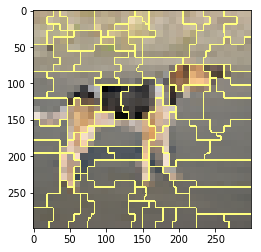

In [20]:
outline = find_boundaries(explanation.segments)
c = img.copy()
c[outline] = (1, 1, 0)
plt.imshow(c / 2 + 0.5)

We can also see the 'pros and cons' (pros in green, cons in red)

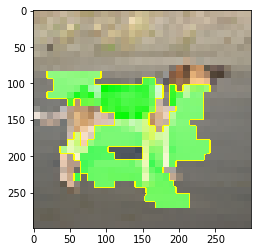

In [21]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Trash Dump